In [2]:
pip install geopandas


Note: you may need to restart the kernel to use updated packages.


In [3]:
import geopandas
geopandas.options

Options(
  display_precision: None [default: None]
      The precision (maximum number of decimals) of the coordinates in the
      WKT representation in the Series/DataFrame display. By default (None),
      it tries to infer and use 3 decimals for projected coordinates and 5
      decimals for geographic coordinates.
  use_pygeos: False [default: False]
      Whether to use PyGEOS to speed up spatial operations. The default is
      True if PyGEOS is installed, and follows the USE_PYGEOS environment
      variable if set.
  )

In [4]:
from shapely.geometry import Point
d = {'col1': ['name1', 'name2'], 'geometry': [Point(1, 2), Point(2, 1)]}
gdf = geopandas.GeoDataFrame(d, crs="EPSG:4326")
gdf

,col1,geometry
0,name1,POINT (1.00000 2.00000)
1,name2,POINT (2.00000 1.00000)


In [5]:
from shapely.geometry import Polygon, Point
s = geopandas.GeoSeries(
    [
        Polygon([(0, 0), (1, 1), (0, 1)])
    ], index=range(0, 1),)
s

0    POLYGON ((0.00000 0.00000, 1.00000 1.00000, 0....
dtype: geometry

In [6]:
point = Point(0.5, 0.6)
s.contains(point)

0    True
dtype: bool

In [7]:
from shapely.geometry import Polygon
d = {'col1': ['name1', 'name2'], 'geometry': [Polygon([(0, 0), (1, 1), (0, 1)]), Polygon([(0, 0), (1, 1), (0, 1)])]}
gdf = geopandas.GeoDataFrame(d, crs="EPSG:4326")
gdf

,col1,geometry
0,name1,"POLYGON ((0.00000 0.00000, 1.00000 1.00000, 0...."
1,name2,"POLYGON ((0.00000 0.00000, 1.00000 1.00000, 0...."


In [8]:
poligon = gdf['geometry'][0]

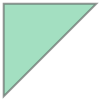

In [9]:
poligon

In [10]:
poligon.contains(point)

True

In [11]:
from shapely.geometry import Polygon, MultiPolygon
d = {'estado': ['ZAC', 'YUC', 'VER', 'TLA', 'TAM', 'TAB', 'SON', 'SIN', 'SLP', 'ROO', 'QUE', 'PUE', 'OAX', 'NLE', 'NAY', 'MOR', 'MIC', 'MX', 'JAL', 'HID', 'GRO','GUA', 'DUR', 'CMX', 'COL','COA', 'CHH', 'CHP', 'CAM', 'BCS', 'BCN', 'AGU'], 'geometry': [Polygon([(-100.8323,24.5549),(-100.854,24.5395),(-100.9758,24.3588),(-101.1047,24.324),(-101.1502,24.2042),(-101.2791,24.1545),(-101.3221,24.0999),(-101.3381,24.0052),(-101.2975,23.9617),(-101.3448,23.853),(-101.3888,23.7965),(-101.5613,23.7476),(-101.626,23.6844),(-101.7439,23.5245),(-101.9501,23.4395),(-102.0052,23.3482),(-102.1226,23.3269),(-102.2414,23.354),(-102.2763,23.2921),(-102.2492,23.2443),(-102.2719,23.1999),(-102.2308,23.0883),(-102.2893,22.8941),(-102.2414,22.8014),(-102.0748,22.7076),(-102.0303,22.6584),(-101.8951,22.6245),(-101.8288,22.5042),(-101.7762,22.4685),(-101.6192,22.5004),(-101.4415,22.6714),(-101.3545,22.6994),(-101.2758,22.6037),(-101.2834,22.5424),(-101.4019,22.3062),(-101.4125,22.2477),(-101.3603,22.1275),(-101.3989,22.0047),(-101.4762,21.8569),(-101.5473,21.8453),(-101.642,21.8878),(-101.7487,21.9753),(-101.8337,22.0178),(-101.9753,22.0516),(-102.0332,22.1641),(-102.0443,22.2182),(-102.168,22.2796),(-102.2748,22.3661),(-102.3057,22.4178),(-102.3984,22.3303),(-102.5371,22.2569),(-102.6516,22.2158),(-102.7091,22.0603),(-102.8216,21.9241),(-102.8714,21.8173),(-102.8685,21.7719),(-102.7748,21.6878),(-102.7786,21.6052),(-102.7525,21.5361),(-102.6414,21.4695),(-102.6608,21.369),(-102.699,21.3197),(-102.7907,21.2675),(-102.9337,21.1583),(-102.9941,21.1772),(-103.0743,21.1385),(-103.0874,21.0627),(-103.1506,21.0294),(-103.2187,21.0453),(-103.3559,20.9994),(-103.4719,21.0598),(-103.5994,21.0709),(-103.6593,21.1651),(-103.7593,21.1883),(-103.7583,21.2187),(-103.5728,21.2922),(-103.554,21.355),(-103.5946,21.382),(-103.6724,21.384),(-103.7062,21.4767),(-103.6347,21.4936),(-103.5699,21.5641),(-103.5641,21.7231),(-103.4472,21.8004),(-103.3767,21.8651),(-103.1656,21.9607),(-103.1332,22.024),(-103.0883,22.1772),(-103.1105,22.2124),(-103.1965,22.2177),(-103.2023,22.3221),(-103.2893,22.3284),(-103.3641,22.3013),(-103.3767,22.252),(-103.3269,22.1936),(-103.4226,22.1231),(-103.4956,22.0424),(-103.5748,22.069),(-103.6023,22.0395),(-103.6796,22.04),(-103.6989,22.0815),(-103.5482,22.311),(-103.5704,22.4259),(-103.683,22.4936),(-103.8202,22.469),(-103.8453,22.4477),(-103.8453,22.1859),(-103.8835,22.138),(-103.9308,22.1733),(-103.9598,22.2472),(-103.9535,22.339),(-103.9129,22.4496),(-103.8279,22.5651),(-103.784,22.5955),(-103.7999,22.6496),(-103.8883,22.6675),(-103.9559,22.6525),(-104.0424,22.596),(-104.0467,22.5666),(-103.9772,22.424),(-103.9709,22.3708),(-104.0119,22.327),(-104.0946,22.3028),(-104.0525,22.4231),(-104.0738,22.4371),(-104.1975,22.3936),(-104.2013,22.3028),(-104.2661,22.2936),(-104.3091,22.2487),(-104.355,22.3004),(-104.3632,22.4032),(-104.3168,22.5163),(-104.2574,22.5869),(-104.1482,22.625),(-104.1284,22.7767),(-104.1318,22.854),(-104.1656,22.9685),(-104.1627,23.0159),(-104.0835,23.1303),(-104.0318,23.3433),(-104.0284,23.4129),(-103.9356,23.5192),(-103.8236,23.6086),(-103.8593,23.7656),(-103.8414,23.8096),(-103.8438,23.9409),(-103.8805,24.0684),(-103.7844,24.095),(-103.6941,24.1733),(-103.6115,24.2772),(-103.5158,24.3438),(-103.4506,24.4366),(-103.2728,24.4332),(-103.1835,24.4076),(-103.0936,24.4366),(-102.9028,24.3757),(-102.8724,24.409),(-102.8052,24.4004),(-102.5627,24.4216),(-102.5385,24.4941),(-102.5791,24.6405),(-102.6274,24.6569),(-102.5951,24.8356),(-102.6883,24.8955),(-102.7371,24.9578),(-102.7482,25.0269),(-102.7472,25.0863),(-102.5067,25.1448),(-102.1309,25.1225),(-102.0294,25.0602),(-101.9294,25.025),(-101.8511,24.9646),(-101.7651,24.8525),(-101.6598,24.8559),(-101.6425,24.7381),(-101.5221,24.7255),(-101.4854,24.7573),(-101.3946,24.7762),(-101.2762,24.7627),(-101.2265,24.7327),
(-101.1497,24.5955),(-101.0951,24.5477),(-101.0115,24.5182),(-100.9168,24.5718),(-100.8323,24.5549)]), 
                                              Polygon([(-87.5386,21.4864),(-87.5256,21.2878),(-87.5662,21.2269),(-87.5851,21.1086),(-87.5319,20.9883),(-87.5358,20.9521),(-87.6352,20.7424),(-87.6459,20.683),(-87.6903,20.6308),(-87.9159,20.4786),(-87.9981,20.4376),(-88.1197,20.425),(-88.1652,20.4627),(-88.212,20.4414),(-88.272,20.3376),(-88.3739,20.3008),(-88.4053,20.2115),(-88.5459,20.1433),(-88.644,20.1188),(-88.7898,20.0192),(-88.8521,20.0057),(-88.9111,19.9487),(-89.0556,19.9318),(-89.1526,19.8922),(-89.2082,19.8395),(-89.3719,19.8148),(-89.3782,19.7269),(-89.4154,19.6511),(-89.4642,19.7985),(-89.5908,19.9337),(-89.6377,20.0279),(-89.7918,20.1071),(-89.871,20.2753),(-89.944,20.3192),(-89.9623,20.3927),(-90.0202,20.4695),(-90.0869,20.4004),(-90.1246,20.4376),(-90.1869,20.4313),(-90.2536,20.5143),(-90.3903,20.5265),(-90.384,20.8008),(-90.4159,20.811),(-90.3613,20.9709),(-90.3193,21.0226),(-90.0956,21.1554),(-89.9956,21.1767),(-89.8266,21.2535),(-89.6642,21.2883),(-89.3942,21.3313),(-89.1049,21.3583),(-88.841,21.3979),(-88.6401,21.4695),(-88.6179,21.5216),(-88.3981,21.5656),(-88.3149,21.5516),(-88.2159,21.5695),(-88.1256,21.6245),(-88.042,21.6071),(-87.9797,21.5665),(-87.8362,21.5574),(-87.7758,21.5057),(-87.6135,21.482),(-87.5386,21.4864)]),
                                              Polygon([(-97.7932,22.2496),(-97.7681,22.0496),(-97.7018,21.8806),(-97.7226,21.8342),(-97.6979,21.7839),(-97.6807,21.6622),(-97.57,21.4642),(-97.5096,21.4767),(-97.484,21.3347),(-97.4444,21.3047),(-97.3917,21.1477),(-97.2589,20.8733),(-97.228,20.8298),(-97.1786,20.6642),(-97.1473,20.6129),(-96.9801,20.4579),(-96.9516,20.412),(-96.7154,20.1714),(-96.5772,20.0067),(-96.5516,19.9545),(-96.4473,19.8453),(-96.4014,19.7211),(-96.3753,19.5632),(-96.3144,19.4825),(-96.3216,19.4144),(-96.2951,19.3144),(-96.1777,19.2468),(-96.0932,19.1516),(-96.0975,19.0927),(-96.0405,19.0569),(-95.9709,19.0545),(-95.9323,18.8917),(-95.8656,18.8337),(-95.8497,18.7448),(-95.7512,18.7434),(-95.7222,18.768),(-95.5622,18.7163),(-95.1816,18.7072),(-94.9898,18.5564),(-94.8173,18.5386),(-94.7231,18.3786),(-94.6265,18.2907),(-94.6043,18.1994),(-94.5434,18.1632),(-94.4651,18.1496),(-94.3463,18.1656),(-94.0559,18.2342),(-94.1082,18.1897),(-94.0961,18.0366),(-94.0739,17.9806),(-94.0748,17.8651),(-93.9767,17.8134),(-93.9193,17.7357),(-93.7555,17.6748),(-93.6937,17.5386),(-93.7019,17.4526),(-93.6744,17.3559),(-93.6096,17.3391),(-93.7584,17.2279),(-93.8362,17.1951),(-93.8739,17.1516),(-94.5884,17.1931),(-95.0154,17.2187),(-95.0024,17.2715),(-95.0492,17.355),(-95.1328,17.4086),(-95.2048,17.4816),(-95.2995,17.6071),(-95.2903,17.6506),(-95.2236,17.7018),(-95.2951,17.7366),(-95.3434,17.695),(-95.4898,17.6598),(-95.6101,17.5791),(-95.7246,17.5729),(-95.7748,17.5477),(-95.8531,17.57),(-95.94,17.7396),(-95.9468,17.812),(-95.9178,17.838),(-95.8371,18.027),(-95.8656,18.1492),(-95.898,18.1888),(-96.025,18.1999),(-96.1043,18.2216),(-96.1806,18.1897),(-96.2424,18.241),(-96.283,18.3129),(-96.3386,18.3439),(-96.3907,18.3294),(-96.4946,18.4231),(-96.5188,18.5274),(-96.4956,18.5758),(-96.5816,18.6332),(-96.5898,18.5492),(-96.6487,18.4294),(-96.7226,18.512),(-96.8255,18.5434),(-96.9367,18.4656),(-97.0043,18.5067),(-97.0439,18.6246),(-97.1961,18.667),(-97.2444,18.7371),(-97.2444,18.8506),(-97.17,18.9424),(-97.1647,18.9849),(-97.1806,19.2299),(-96.9666,19.226),(-96.9835,19.3236),(-97.1004,19.3719),(-97.2454,19.4028),(-97.3164,19.4564),(-97.2951,19.4883),(-97.3492,19.6216),(-97.3168,19.6574),(-97.2376,19.8265),(-97.2424,19.8941),(-97.1763,20.0559),(-97.0932,20.1878),(-97.3753,20.2815),(-97.4956,20.1439),(-97.5448,20.1376),(-97.5791,20.2048),(-97.6879,20.2173),(-97.7062,20.3067),(-97.7086,20.4579),(-97.6618,20.4864),(-97.5975,20.4516),(-97.54,20.5255),(-97.5569,20.5868),(-97.6782,20.6642),(-97.7023,20.7502),(-97.6936,20.8496),(-97.8222,20.852),(-97.8714,20.7472),(-97.9101,20.7193),(-97.9381,20.623),(-98.0294,20.6453),(-98.1149,20.5579),(-98.1786,20.5303),(-98.254,20.4463),(-98.3531,20.4028),(-98.4261,20.3361),(-98.5081,20.4743),(-98.4748,20.6014),(-98.4618,20.739),(-98.4231,20.7916),(-98.3275,20.8728),(-98.2555,20.8207),(-98.1975,20.8294),(-98.2096,20.8926),(-98.1845,20.9758),(-98.1115,21.0559),(-98.211,21.196),(-98.2922,21.2192),(-98.3265,21.1859),(-98.4294,21.2129),(-98.5023,21.2772),(-98.4898,21.3462),(-98.5362,21.411),(-98.5415,21.5361),(-98.5946,21.5443),(-98.6202,21.6008),(-98.6222,21.6999),(-98.5318,21.724),(-98.4603,21.8013),(-98.5424,21.8661),(-98.5584,21.9641),(-98.4907,21.9612),(-98.4642,21.9965),(-98.4767,22.0916),(-98.4342,22.1183),(-98.3332,22.1202),(-98.3811,22.2525),(-98.4391,22.2951),(-98.5845,22.3308),(-98.6786,22.3294),(-98.7115,22.3733),(-98.6405,22.411),(-98.4743,22.4202),(-98.3786,22.3748),(-98.2995,22.3912),(-98.2917,22.4429),(-98.1902,22.4535),(-98.1613,22.4052),(-98.0526,22.3462),(-97.9985,22.3399),(-97.8729,22.1975),(-97.7932,22.2496),(-97.6164,21.8352),(-97.5627,21.767),(-97.4497,21.6646),(-97.3463,21.5893),(-97.3294,21.5159),(-97.4125,21.3351),(-97.4497,21.3526),(-97.3791,21.481),(-97.3845,21.5308),(-97.4546,21.5926),(-97.5062,21.6675),(-97.6192,21.7845),(-97.6164,21.8352)]),
                                              Polygon([(-98.5849,19.4675),(-98.6361,19.4811),(-98.6747,19.5501),(-98.4743,19.6149),(-98.3511,19.6168),(-98.2603,19.7183),(-98.1652,19.6994),(-98.0584,19.6941),(-97.9965,19.7632),(-97.7777,19.5811),(-97.7565,19.5197),(-97.6956,19.5386),(-97.6237,19.4772),(-97.6111,19.4327),(-97.5468,19.4023),(-97.5908,19.3381),(-97.7313,19.3308),(-97.7874,19.2424),(-97.8675,19.2086),(-97.9487,19.2448),(-98.0714,19.1429),(-98.1057,19.1376),(-98.268,19.2226),(-98.3366,19.3245),(-98.5323,19.4777),(-98.5849,19.4675)]),
                                              Polygon([(-97.7932,22.2496),(-97.8729,22.1975),(-97.9985,22.3399),(-98.0526,22.3462),(-98.1613,22.4052),(-98.1902,22.4535),(-98.2917,22.4429),(-98.2995,22.3912),(-98.3786,22.3748),(-98.4743,22.4202),(-98.6405,22.411),(-98.7115,22.3733),(-98.8352,22.3631),(-98.9106,22.4071),(-98.939,22.3777),(-99.1115,22.3893),(-99.183,22.3811),(-99.269,22.4868),(-99.3057,22.5806),(-99.3941,22.6641),(-99.4617,22.6849),(-99.5187,22.7448),(-99.5816,22.6699),(-99.6695,22.697),(-99.7999,22.7066),(-99.968,22.7574),(-100.0115,22.7917),(-100.0284,22.9275),(-100.0149,23.0617),(-100.0752,23.1332),(-100.0811,23.209),(-100.1168,23.2482),(-100.1217,23.3265),(-100.0898,23.3516),(-99.9661,23.3375),(-99.9748,23.468),(-99.9603,23.5429),(-99.9013,23.6081),(-99.8748,23.7115),(-99.7825,23.7569),(-99.6806,23.7318),(-99.582,23.7728),(-99.554,23.8322),(-99.4642,23.8158),(-99.4946,23.9018),(-99.5492,23.9303),(-99.6052,24.0636),(-99.6801,24.1675),(-99.6395,24.3549),(-99.6757,24.4719),(-99.7738,24.4911),(-99.7463,24.568),(-99.6666,24.6172),(-99.5521,24.6636),(-99.4874,24.7472),(-99.4299,24.7376),(-99.385,24.796),(-99.2497,24.8168),(-99.2308,24.8753),(-99.1579,24.9037),(-99.1429,24.9646),(-99.1907,25.0269),(-99.0748,25.1603),(-99.0303,25.1163),(-98.9183,25.1081),(-98.8487,25.2235),(-98.6738,25.2544),(-98.5487,25.3506),(-98.4989,25.3733),(-98.4149,25.4989),(-98.5106,25.5313),(-98.5613,25.6472),(-98.5342,25.7501),(-98.5579,25.8052),(-98.5458,25.926),(-98.6106,26.0317),(-98.7883,26.0124),(-98.8637,25.9651),(-98.9328,25.9767),(-99.0062,26.0824),(-99.1371,26.0989),(-99.1975,26.2492),(-99.255,26.2259),(-99.3559,26.3158),(-99.4284,26.4052),(-99.4782,26.554),(-99.5531,26.5622),(-99.5868,26.6303),(-99.6806,26.6607),(-99.6526,26.8226),(-99.7874,26.9124),(-99.755,26.9979),(-99.6893,27.0477),(-99.7062,27.1617),(-99.7521,27.2023),(-99.7531,27.3395),(-99.8038,27.3704),(-99.7671,27.4573),(-99.8482,27.4516),(-99.9429,27.4752),(-99.9149,27.566),(-99.8038,27.5946),(-99.7265,27.668),(-99.5994,27.6405),(-99.5149,27.5622),(-99.5299,27.5008),(-99.4825,27.482),(-99.5144,27.3312),(-99.4593,27.2661),(-99.4294,27.1771),(-99.4453,27.0216),(-99.3816,26.9723),(-99.2845,26.8578),(-99.1753,26.6255),(-99.1714,26.5405),(-99.0941,26.4786),(-99.113,26.4332),(-98.9753,26.3994),(-98.954,26.3728),(-98.8361,26.3612),(-98.7381,26.3254),(-98.6772,26.2525),(-98.582,26.2564),(-98.3502,26.1515),(-98.2449,26.0718),(-98.1492,26.0506),(-98.0801,26.0689),(-97.9705,26.0535),(-97.8864,26.0641),(-97.7651,26.0265),(-97.7116,26.0337),(-97.626,25.9955),(-97.5231,25.8883),(-97.4294,25.8409),(-97.3627,25.8675),(-97.3454,25.9322),(-97.2139,25.9627),(-97.1454,25.9544),(-97.1439,25.8883),(-97.1743,25.7008),(-97.1975,25.638),(-97.3569,25.3656),(-97.3923,25.4018),(-97.5086,25.4468),(-97.5425,25.3699),(-97.5308,25.2902),(-97.6072,25.3076),(-97.6221,25.3695),(-97.6912,25.3622),(-97.7347,25.2317),(-97.6709,25.1752),(-97.7531,24.9825),(-97.6917,24.94),(-97.7458,24.8279),(-97.7188,24.74),(-97.7381,24.6781),(-97.7086,24.6438),(-97.7695,24.5598),(-97.8613,24.5235),(-97.8202,24.3849),(-97.7545,24.4433),(-97.7448,24.3255),(-97.7714,24.1385),(-97.7734,23.8061),(-97.741,23.6762),(-97.7681,23.4061),(-97.7608,23.0067),(-97.7691,22.8738),(-97.8028,22.7786),(-97.8526,22.7226),(-97.8984,22.6003),(-97.8593,22.5733),(-97.8734,22.4327),(-97.8332,22.3651),(-97.7932,22.2496)]),
                                              Polygon([(-92.4681,18.6497),(-92.4227,18.5081),(-92.2729,18.3927),(-92.2338,18.4071),(-92.1893,18.3531),(-92.2009,18.2941),(-92.0869,18.0965),(-91.9483,18.0076),(-91.9135,17.953),(-91.8014,17.9337),(-91.713,17.8907),(-91.5942,17.9197),(-91.5835,18.0666),(-91.472,18.0714),(-91.326,18.041),(-91.2604,17.9815),(-90.9811,17.8777),(-90.9821,17.8149),(-90.9903,17.2593),(-91.412,17.2526),(-91.3603,17.3028),(-91.4043,17.3714),(-91.5338,17.4434),(-91.6198,17.4497),(-91.6367,17.4849),(-91.6077,17.5651),(-91.6585,17.6917),(-91.7608,17.74),(-91.7628,17.8168),(-91.8053,17.869),(-91.9009,17.8651),(-92,17.8965),(-92.0285,17.826),(-92.1618,17.8448),(-92.1975,17.8154),(-92.1966,17.7182),(-92.2874,17.6936),(-92.5033,17.5245),(-92.5835,17.4772),(-92.7299,17.3613),(-92.7889,17.3705),(-92.8482,17.4849),(-92.9686,17.5077),(-92.9565,17.5791),(-93.0541,17.6984),(-92.9917,17.8018),(-92.9946,17.8719),(-93.0893,17.8632),(-93.1541,17.924),(-93.2613,17.9738),(-93.3492,17.94),(-93.3671,17.828),(-93.3652,17.7376),(-93.4029,17.6245),(-93.5062,17.5226),(-93.5086,17.4608),(-93.6096,17.3391),(-93.6744,17.3559),(-93.7019,17.4526),(-93.6937,17.5386),(-93.7555,17.6748),(-93.9193,17.7357),(-93.9767,17.8134),(-94.0748,17.8651),(-94.0739,17.9806),(-94.0961,18.0366),(-94.1082,18.1897),(-94.0559,18.2342),(-93.8777,18.2917),(-93.8719,18.2443),(-93.7657,18.2622),(-93.754,18.3149),(-93.5927,18.3255),(-93.5734,18.3951),(-93.3985,18.4327),(-93.1835,18.4415),(-93.1719,18.3709),(-93.0787,18.3757),(-93.0541,18.4323),(-92.8893,18.4438),(-92.769,18.5062),(-92.6995,18.598),(-92.4681,18.6497)]),
                                              Polygon([(-112.2834,29.2332),(-112.2747,29.1385),(-112.195,29.0192),(-112.239,28.8718),(-112.3085,28.7467),(-112.5805,28.8747),(-112.4907,28.9482),(-112.5066,29.0134),(-112.4776,29.167),(-112.3607,29.2206),(-112.2834,29.2332),(-108.7723,31.3327),(-108.7289,31.2863),(-108.768,31.253),(-108.6979,31.1245),(-108.6718,31.0346),(-108.6907,30.9283),(-108.7308,30.8771),(-108.6458,30.8134),(-108.6424,30.7298),(-108.6008,30.6979),(-108.6274,30.6424),(-108.5868,30.5829),(-108.5042,30.3095),(-108.5429,30.1941),(-108.4849,30.1095),(-108.5419,29.9936),(-108.5457,29.8138),(-108.5004,29.7979),(-108.4665,29.5627),(-108.467,29.4718),(-108.5052,29.4071),(-108.495,29.2086),(-108.5511,29.1776),(-108.5656,29.0728),(-108.6163,29.0423),(-108.6066,28.939),(-108.6404,28.894),(-108.6197,28.8114),(-108.6675,28.7085),(-108.6699,28.6419),(-108.6395,28.5771),(-108.6612,28.5202),(-108.597,28.437),(-108.5071,28.4066),(-108.6066,28.3182),(-108.7289,28.2757),(-108.8303,28.3269),(-108.8883,28.2969),(-108.9892,28.2796),(-109.0308,28.2303),(-108.9607,28.1709),(-108.9844,28.0733),(-108.896,28.0226),(-108.8124,27.9167),(-108.7974,27.8578),(-108.8255,27.7709),(-108.6922,27.6873),(-108.5632,27.4172),(-108.5617,27.3559),(-108.6115,27.2438),(-108.5926,27.1206),(-108.6226,27.0892),(-108.481,27.0236),(-108.4004,27.0458),(-108.3298,27.0317),(-108.3424,26.968),(-108.467,26.8288),(-108.4554,26.7395),(-108.5298,26.7197),(-108.6119,26.581),(-108.7752,26.5458),(-108.7984,26.425),(-108.8781,26.4042),(-109.0462,26.3008),(-109.0825,26.3675),(-109.1646,26.3772),(-109.2414,26.4187),(-109.2366,26.4549),(-109.2907,26.5429),(-109.4317,26.6704),(-109.4458,26.7168),(-109.5269,26.7588),(-109.5617,26.6892),(-109.6829,26.6752),(-109.767,26.7085),(-109.8516,26.7912),(-109.8999,26.9496),(-109.9201,27.0675),(-109.9892,27.1168),(-110.0612,27.0839),(-110.1023,27.1081),(-110.3013,27.1525),(-110.466,27.294),(-110.4791,27.3728),(-110.553,27.3926),(-110.5902,27.4665),(-110.5892,27.54),(-110.6279,27.624),(-110.5689,27.6863),(-110.6134,27.7738),(-110.5771,27.881),(-110.68,27.8897),(-110.8535,27.9472),(-110.9245,27.867),(-110.9714,27.953),(-111.0776,27.9361),(-111.2501,28.0521),(-111.3279,28.1569),(-111.3312,28.1878),(-111.4549,28.3129),(-111.4936,28.3878),(-111.7114,28.4588),(-111.7641,28.5912),(-111.9245,28.7202),(-111.9013,28.794),(-112.0308,28.8587),(-112.0974,28.9515),(-112.1738,28.9708),(-112.1656,29.1129),(-112.2085,29.2443),(-112.2588,29.3283),(-112.3443,29.3138),(-112.4013,29.3356),(-112.4187,29.3829),(-112.3815,29.4525),(-112.3907,29.5008),(-112.4767,29.5897),(-112.5433,29.6887),(-112.5805,29.7114),(-112.652,29.8351),(-112.6651,29.8906),(-112.7477,29.9158),(-112.7337,30.0013),(-112.7583,30.0525),(-112.753,30.1728),(-112.7733,30.2216),(-112.8511,30.2873),(-112.8554,30.3931),(-112.8984,30.4588),(-112.9902,30.5331),(-113.0825,30.6723),(-113.1278,30.8129),(-113.0844,30.9931),(-113.0544,31.0665),(-113.0945,31.1844),(-113.2056,31.2303),(-113.3607,31.2674),(-113.5452,31.296),(-113.623,31.3269),(-113.6138,31.3771),(-113.6559,31.4916),(-113.8815,31.6085),(-114.0331,31.4902),(-114.1472,31.4935),(-114.2723,31.5423),(-114.3298,31.5955),(-114.5259,31.6984),(-114.5897,31.7554),(-114.6757,31.7602),(-114.7269,31.78),(-114.766,31.8201),(-114.7989,31.8201),(-115.0264,31.951),(-114.995,32.0771),(-115.0066,32.1457),(-114.982,32.2095),(-115.038,32.2771),(-114.9655,32.3597),(-114.9153,32.4926),(-114.8143,32.4955),(-113.9593,32.2341),(-112.9424,31.9187),(-112.2235,31.696),(-111.6182,31.5052),(-111.0728,31.3293),(-110.4602,31.3317),(-109.7583,31.3322),(-108.7723,31.3327),(-114.7863,31.8192),(-114.6646,31.7211),(-114.7148,31.68),(-114.7916,31.7293),(-114.8071,31.7631),(-114.7863,31.8192)]),
                                              Polygon([(-108.1395,25.0506),(-108.038,24.923),(-108.0419,24.8448),(-108.1385,24.9443),(-108.1395,25.0506),(-108.3317,25.1255),(-108.2753,25.0916),(-108.1028,24.8839),(-108.125,24.8554),(-108.224,25.0153),(-108.3317,25.1255),(-109.2163,26.323),(-109.1752,26.3187),(-109.1646,26.3772),(-109.0825,26.3675),(-109.0462,26.3008),(-108.8781,26.4042),(-108.7984,26.425),(-108.7752,26.5458),(-108.6119,26.581),(-108.5298,26.7197),(-108.4554,26.7395),(-108.467,26.8288),(-108.3424,26.968),(-108.3298,27.0317),(-108.1347,27.0395),(-108.0999,27.0066),(-108.1028,26.9221),(-108.0293,26.9226),(-107.9873,26.839),(-108.0032,26.6564),(-107.9468,26.5989),(-107.9308,26.5168),(-107.8448,26.4023),(-107.7907,26.2998),(-107.7463,26.1568),(-107.6057,26.1269),(-107.4781,26.1158),(-107.3839,26.0907),(-107.2685,25.9144),(-107.2448,25.7975),(-107.1593,25.6965),(-107.1694,25.6235),(-107.2385,25.5433),(-107.1926,25.4955),(-107.2458,25.3791),(-107.2491,25.1931),(-107.2694,25.1216),(-107.2293,25.0994),(-107.1322,24.923),(-107.11,24.8399),(-106.9844,24.8433),(-106.9487,24.7481),(-106.896,24.7371),(-106.8477,24.5738),(-106.7941,24.5728),(-106.7617,24.4221),(-106.6989,24.2989),(-106.6376,24.2873),(-106.4453,24.3922),(-106.4187,24.4303),(-106.2574,24.3873),(-106.1994,24.352),(-106.0453,24.1699),(-106.0419,24.0892),(-105.9796,23.9269),(-105.9511,23.8878),(-105.926,23.7796),(-105.8467,23.6622),(-105.7781,23.6013),(-105.7607,23.4979),(-105.7187,23.3902),(-105.7294,23.3559),(-105.6651,23.2665),(-105.6216,23.1115),(-105.482,23.126),(-105.3975,23.0453),(-105.4308,23.0226),(-105.453,22.8965),(-105.5207,22.8187),(-105.5158,22.7327),(-105.4728,22.697),(-105.4303,22.5458),(-105.454,22.51),(-105.583,22.5342),(-105.667,22.5801),(-105.7071,22.5564),(-105.7211,22.4921),(-105.8501,22.6888),(-105.969,22.795),(-106.04,22.8356),(-106.2086,23.0269),(-106.4545,23.2434),(-106.4786,23.3192),(-106.5284,23.3917),(-106.6303,23.4839),(-106.7941,23.6709),(-106.882,23.796),(-106.8912,23.8409),(-106.9916,23.9356),(-107.1916,24.0965),(-107.2472,24.1593),(-107.3598,24.2327),(-107.4158,24.2453),(-107.5651,24.3661),(-107.481,24.3883),(-107.4912,24.4458),(-107.5661,24.5264),(-107.597,24.468),(-107.7511,24.4989),(-107.8235,24.5873),(-107.9839,24.6399),(-108.0124,24.7206),(-107.9917,24.8062),(-108.0458,25.0569),(-108.1013,25.1076),(-108.1641,25.1067),(-108.252,25.1984),(-108.3632,25.2607),(-108.3883,25.1853),(-108.4617,25.2641),(-108.6776,25.3622),(-108.7477,25.4081),(-108.7854,25.4743),(-108.7583,25.5226),(-108.839,25.5646),(-108.9061,25.5597),(-108.8868,25.5027),(-108.9337,25.4549),(-108.9752,25.5086),(-109.0438,25.4636),(-109.1168,25.5409),(-109.0332,25.5853),(-108.9781,25.5762),(-108.9236,25.6245),(-108.9371,25.6718),(-109.0216,25.6501),(-109.0564,25.5839),(-109.1656,25.6269),(-109.2868,25.7274),(-109.4288,25.7917),(-109.4124,25.8912),(-109.4443,25.9361),(-109.4366,25.9984),(-109.353,26.1318),(-109.2743,26.1549),(-109.2201,26.2641),(-109.2163,26.323)]),
                                              Polygon([(-100.1168,23.2482),(-100.0811,23.209),(-100.0752,23.1332),(-100.0149,23.0617),(-100.0284,22.9275),(-100.0115,22.7917),(-99.968,22.7574),(-99.7999,22.7066),(-99.6695,22.697),(-99.5816,22.6699),(-99.5187,22.7448),(-99.4617,22.6849),(-99.3941,22.6641),(-99.3057,22.5806),(-99.269,22.4868),(-99.183,22.3811),(-99.1115,22.3893),(-98.939,22.3777),(-98.9106,22.4071),(-98.8352,22.3631),(-98.7115,22.3733),(-98.6786,22.3294),(-98.5845,22.3308),(-98.4391,22.2951),(-98.3811,22.2525),(-98.3332,22.1202),(-98.4342,22.1183),(-98.4767,22.0916),(-98.4642,21.9965),(-98.4907,21.9612),(-98.5584,21.9641),(-98.5424,21.8661),(-98.4603,21.8013),(-98.5318,21.724),(-98.6222,21.6999),(-98.6202,21.6008),(-98.5946,21.5443),(-98.5415,21.5361),(-98.5362,21.411),(-98.6033,21.412),(-98.6661,21.3429),(-98.7193,21.2322),(-98.7642,21.2559),(-98.81,21.1921),(-98.9067,21.2318),(-98.9521,21.3216),(-99.0424,21.2936),(-99.2391,21.4834),(-99.2704,21.5569),(-99.3521,21.5501),(-99.3946,21.4468),(-99.5945,21.4506),(-99.6434,21.5462),(-99.7038,21.5835),(-99.7816,21.5148),(-99.8874,21.4651),(-100.0666,21.4714),(-100.1347,21.5511),(-100.2902,21.6482),(-100.4458,21.696),(-100.4888,21.6685),(-100.5076,21.5583),(-100.5685,21.5356),(-100.6781,21.5347),(-100.8598,21.6366),(-100.9502,21.7114),(-101.0781,21.7535),(-101.2632,21.7931),(-101.3134,21.8202),(-101.4299,21.8318),(-101.4762,21.8569),(-101.3989,22.0047),(-101.3603,22.1275),(-101.4125,22.2477),(-101.4019,22.3062),(-101.2834,22.5424),(-101.2758,22.6037),(-101.3545,22.6994),(-101.4415,22.6714),(-101.6192,22.5004),(-101.7762,22.4685),(-101.8288,22.5042),(-101.8951,22.6245),(-102.0303,22.6584),(-102.0748,22.7076),(-102.2414,22.8014),(-102.2893,22.8941),(-102.2308,23.0883),(-102.2719,23.1999),(-102.2492,23.2443),(-102.2763,23.2921),(-102.2414,23.354),(-102.1226,23.3269),(-102.0052,23.3482),(-101.9501,23.4395),(-101.7439,23.5245),(-101.626,23.6844),(-101.5613,23.7476),(-101.3888,23.7965),(-101.3448,23.853),(-101.2975,23.9617),(-101.3381,24.0052),(-101.3221,24.0999),(-101.2791,24.1545),(-101.1502,24.2042),(-101.1047,24.324),(-100.9758,24.3588),(-100.854,24.5395),(-100.8067,24.468),(-100.6878,24.4433),(-100.6815,24.3641),(-100.7294,24.3066),(-100.6463,24.2144),(-100.6516,24.1622),(-100.5525,24.0472),(-100.5173,23.9646),(-100.5255,23.8042),(-100.4869,23.7506),(-100.4989,23.624),(-100.5284,23.5115),(-100.5081,23.4646),(-100.498,23.3139),(-100.426,23.1989),(-100.3661,23.1723),(-100.2729,23.2757),(-100.1168,23.2482)]),
                                              Polygon([(-86.7275,20.5927),(-86.7705,20.4956),(-86.9324,20.312),(-86.9889,20.2714),(-87.0217,20.3395),(-87.0169,20.4115),(-86.9256,20.5526),(-86.8367,20.5395),(-86.7275,20.5927),(-89.1458,17.942),(-89.156,18.0361),(-89.0584,18.1443),(-89.0324,18.2275),(-89.0468,18.3719),(-89.0656,18.4245),(-89.043,18.4883),(-89.0556,18.5578),(-89.1009,18.6323),(-89.1058,18.7139),(-89.0758,18.8758),(-89.0845,18.9714),(-89.0246,19.0144),(-89.0121,19.2318),(-89.0976,19.3661),(-89.2189,19.483),(-89.3618,19.5825),(-89.4154,19.6511),(-89.3782,19.7269),(-89.3719,19.8148),(-89.2082,19.8395),(-89.1526,19.8922),(-89.0556,19.9318),(-88.9111,19.9487),(-88.8521,20.0057),(-88.7898,20.0192),(-88.644,20.1188),(-88.5459,20.1433),(-88.4053,20.2115),(-88.3739,20.3008),(-88.272,20.3376),(-88.212,20.4414),(-88.1652,20.4627),(-88.1197,20.425),(-87.9981,20.4376),(-87.9159,20.4786),(-87.6903,20.6308),(-87.6459,20.683),(-87.6352,20.7424),(-87.5358,20.9521),(-87.5319,20.9883),(-87.5851,21.1086),(-87.5662,21.2269),(-87.5256,21.2878),(-87.5386,21.4864),(-87.3541,21.4468),(-87.1889,21.44),(-87.1125,21.4714),(-87.1029,21.584),(-87.0097,21.5564),(-86.8869,21.4033),(-86.8483,21.2516),(-86.801,21.2381),(-86.7995,21.1569),(-86.7517,21.125),(-86.8217,21.0033),(-86.8725,20.8511),(-87.0087,20.7042),(-87.0985,20.5927),(-87.2536,20.4781),(-87.3227,20.3868),(-87.3633,20.2936),(-87.4217,20.2284),(-87.4783,20.0781),(-87.4531,19.9337),(-87.4971,19.8071),(-87.5782,19.7902),(-87.643,19.6874),(-87.7236,19.6685),(-87.7478,19.5994),(-87.6502,19.5052),(-87.6145,19.553),(-87.4362,19.5946),(-87.4145,19.5642),(-87.4439,19.4694),(-87.5232,19.397),(-87.559,19.4231),(-87.6367,19.3719),(-87.6758,19.1994),(-87.6357,19.2081),(-87.5672,19.2839),(-87.5067,19.3216),(-87.4497,19.3076),(-87.5382,19.2076),(-87.5492,19.0859),(-87.6309,18.9284),(-87.6758,18.7477),(-87.7116,18.711),(-87.7638,18.4178),(-87.8213,18.3284),(-87.8435,18.2014),(-87.8971,18.2458),(-87.8802,18.3496),(-87.9391,18.3941),(-87.9314,18.4332),(-88.0666,18.4859),(-88.0048,18.6641),(-88.0179,18.7922),(-88.0686,18.8617),(-88.2671,18.5221),(-88.2923,18.4922),(-88.4812,18.4922),(-88.5179,18.4608),(-88.5531,18.3458),(-88.5957,18.3028),(-88.6135,18.2255),(-88.657,18.1729),(-88.7029,18.0627),(-88.7594,18.0327),(-88.7826,17.9787),(-88.8802,17.9067),(-89.0217,18.0009),(-89.0937,17.9859),(-89.1458,17.942)]),
                                              Polygon([(-99.0424,21.2936),(-99.0777,21.1979),(-99.2579,21.1279),(-99.3061,21.1545),(-99.3724,21.1009),(-99.3613,21.0593),(-99.4134,20.9178),(-99.4922,20.8569),(-99.539,20.7415),(-99.513,20.6849),(-99.6057,20.6245),(-99.8221,20.5535),(-99.8622,20.3071),(-99.9062,20.2772),(-99.9593,20.1965),(-99.9477,20.1313),(-100.0245,20.0554),(-100.1265,20.0438),(-100.2579,20.1583),(-100.2632,20.2129),(-100.3613,20.2965),(-100.3902,20.3593),(-100.4709,20.4125),(-100.5144,20.4825),(-100.5139,20.5844),(-100.584,20.7052),(-100.5724,20.8019),(-100.5294,20.9009),(-100.3463,20.9115),(-100.2864,20.9381),(-100.1777,20.9241),(-100.1096,20.9622),(-100.0869,21.0767),(-99.997,21.2018),(-99.9361,21.2226),(-99.8671,21.1574),(-99.7429,21.2274),(-99.7222,21.3318),(-99.812,21.3477),(-99.7661,21.4192),(-99.7816,21.5148),(-99.7038,21.5835),(-99.6434,21.5462),(-99.5945,21.4506),(-99.3946,21.4468),(-99.3521,21.5501),(-99.2704,21.5569),(-99.2391,21.4834),(-99.0424,21.2936)]),
                                              Polygon([(-96.6487,18.4294),(-96.7579,18.2656),(-96.8531,18.2463),(-96.9946,18.1429),(-97.1434,18.1767),(-97.2265,18.1492),(-97.3014,18.067),(-97.3377,17.9946),(-97.4052,17.9888),(-97.4197,18.0516),(-97.5067,18.2004),(-97.5632,18.2526),(-97.5101,18.2869),(-97.5342,18.3545),(-97.6603,18.3207),(-97.7415,18.1555),(-97.6299,18.0637),(-97.6979,17.9844),(-97.7739,17.9902),(-97.8434,18.0482),(-97.9193,18.0294),(-98.0574,18.0289),(-98.1202,18.0153),(-98.2028,17.9637),(-98.2506,17.9101),(-98.3149,17.9405),(-98.3791,18.0163),(-98.5502,17.9767),(-98.555,18.0178),(-98.7231,18.0859),(-98.7145,18.1579),(-98.8177,18.1458),(-98.8666,18.2318),(-98.9743,18.3004),(-98.9724,18.3472),(-98.8763,18.4081),(-98.8371,18.4574),(-98.7386,18.5342),(-98.6284,18.4337),(-98.6062,18.4612),(-98.6579,18.7207),(-98.5806,18.9647),(-98.5468,19.0289),(-98.5516,19.196),(-98.5874,19.3038),(-98.5695,19.3984),(-98.5849,19.4675),(-98.5323,19.4777),(-98.3366,19.3245),(-98.268,19.2226),(-98.1057,19.1376),(-98.0714,19.1429),(-97.9487,19.2448),(-97.8675,19.2086),(-97.7874,19.2424),(-97.7313,19.3308),(-97.5908,19.3381),(-97.5468,19.4023),(-97.6111,19.4327),(-97.6237,19.4772),(-97.6956,19.5386),(-97.7565,19.5197),(-97.7777,19.5811),(-97.9965,19.7632),(-98.0584,19.6941),(-98.1652,19.6994),(-98.1932,19.8782),(-98.1318,19.9946),(-98.0995,20.1758),(-98.1178,20.2584),(-98.2023,20.2405),(-98.227,20.3028),(-98.0859,20.3632),(-98.0492,20.4153),(-97.9352,20.5101),(-97.9381,20.623),(-97.9101,20.7193),(-97.8714,20.7472),(-97.8222,20.852),(-97.6936,20.8496),(-97.7023,20.7502),(-97.6782,20.6642),(-97.5569,20.5868),(-97.54,20.5255),(-97.5975,20.4516),(-97.6618,20.4864),(-97.7086,20.4579),(-97.7062,20.3067),(-97.6879,20.2173),(-97.5791,20.2048),(-97.5448,20.1376),(-97.4956,20.1439),(-97.3753,20.2815),(-97.0932,20.1878),(-97.1763,20.0559),(-97.2424,19.8941),(-97.2376,19.8265),(-97.3168,19.6574),(-97.3492,19.6216),(-97.2951,19.4883),(-97.3164,19.4564),(-97.2454,19.4028),(-97.1004,19.3719),(-96.9835,19.3236),(-96.9666,19.226),(-97.1806,19.2299),(-97.1647,18.9849),(-97.17,18.9424),(-97.2444,18.8506),(-97.2444,18.7371),(-97.1961,18.667),(-97.0439,18.6246),(-97.0043,18.5067),(-96.9367,18.4656),(-96.8255,18.5434),(-96.7226,18.512),(-96.6487,18.4294)]),
                                              Polygon([(-93.8739,17.1516),(-93.8864,17.0386),(-93.9169,16.9994),(-93.9487,16.8651),(-94.0599,16.7738),(-94.1536,16.5221),(-94.157,16.4893),(-94.1072,16.3762),(-94.128,16.3202),(-94.1225,16.2218),(-94.2009,16.1874),(-94.3362,16.2376),(-94.3719,16.2956),(-94.4164,16.2806),(-94.4429,16.2163),(-94.398,16.1792),(-94.2236,16.1666),(-94.1009,16.0782),(-94.1082,16.0535),(-94.2961,16.1338),(-94.4144,16.1685),(-94.7028,16.212),(-94.6261,16.2641),(-94.5806,16.3328),(-94.6758,16.3651),(-94.7429,16.3009),(-94.8623,16.4323),(-94.9289,16.4154),(-94.9811,16.3294),(-95.0308,16.3304),(-95.1014,16.2323),(-94.9173,16.2351),(-94.912,16.2101),(-95.2768,16.1424),(-95.3343,16.0907),(-95.369,16.0193),(-95.4309,15.9806),(-95.5801,15.9468),(-95.6613,15.9125),(-95.7589,15.8995),(-95.8101,15.8666),(-95.9637,15.8274),(-96.1309,15.7531),(-96.2415,15.6849),(-96.4193,15.6956),(-96.4941,15.6579),(-96.557,15.6593),(-96.698,15.7168),(-96.8584,15.74),(-97.0173,15.8062),(-97.0589,15.8569),(-97.2091,15.9226),(-97.3395,15.9463),(-97.4202,15.941),(-97.5255,15.9695),(-97.7724,15.9772),(-97.9313,16.0806),(-98.2168,16.2337),(-98.4033,16.2661),(-98.5559,16.3192),(-98.3705,16.4559),(-98.3521,16.5337),(-98.2608,16.5994),(-98.1879,16.6719),(-98.1806,16.7241),(-98.0946,16.7584),(-98.0409,16.8183),(-98.0217,16.9043),(-98.0531,16.9849),(-98.1101,17.0173),(-98.1236,17.1357),(-98.2376,17.1854),(-98.2304,17.2646),(-98.1936,17.2965),(-98.2178,17.4724),(-98.3135,17.6588),(-98.3202,17.7588),(-98.2506,17.9101),(-98.2028,17.9637),(-98.1202,18.0153),(-98.0574,18.0289),(-97.9193,18.0294),(-97.8434,18.0482),(-97.7739,17.9902),(-97.6979,17.9844),(-97.6299,18.0637),(-97.7415,18.1555),(-97.6603,18.3207),(-97.5342,18.3545),(-97.5101,18.2869),(-97.5632,18.2526),(-97.5067,18.2004),(-97.4197,18.0516),(-97.4052,17.9888),(-97.3377,17.9946),(-97.3014,18.067),(-97.2265,18.1492),(-97.1434,18.1767),(-96.9946,18.1429),(-96.8531,18.2463),(-96.7579,18.2656),(-96.6487,18.4294),(-96.5898,18.5492),(-96.5816,18.6332),(-96.4956,18.5758),(-96.5188,18.5274),(-96.4946,18.4231),(-96.3907,18.3294),(-96.3386,18.3439),(-96.283,18.3129),(-96.2424,18.241),(-96.1806,18.1897),(-96.1043,18.2216),(-96.025,18.1999),(-95.898,18.1888),(-95.8656,18.1492),(-95.8371,18.027),(-95.9178,17.838),(-95.9468,17.812),(-95.94,17.7396),(-95.8531,17.57),(-95.7748,17.5477),(-95.7246,17.5729),(-95.6101,17.5791),(-95.4898,17.6598),(-95.3434,17.695),(-95.2951,17.7366),(-95.2236,17.7018),(-95.2903,17.6506),(-95.2995,17.6071),(-95.2048,17.4816),(-95.1328,17.4086),(-95.0492,17.355),(-95.0024,17.2715),(-95.0154,17.2187),(-94.5884,17.1931),(-93.8739,17.1516)]),
                                              Polygon([(-99.7265,27.668),(-99.8038,27.5946),(-99.9149,27.566),(-99.9429,27.4752),(-99.8482,27.4516),(-99.7671,27.4573),(-99.8038,27.3704),(-99.7531,27.3395),(-99.7521,27.2023),(-99.7062,27.1617),(-99.6893,27.0477),(-99.755,26.9979),(-99.7874,26.9124),(-99.6526,26.8226),(-99.6806,26.6607),(-99.5868,26.6303),(-99.5531,26.5622),(-99.4782,26.554),(-99.4284,26.4052),(-99.3559,26.3158),(-99.255,26.2259),(-99.1975,26.2492),(-99.1371,26.0989),(-99.0062,26.0824),(-98.9328,25.9767),(-98.8637,25.9651),(-98.7883,26.0124),(-98.6106,26.0317),(-98.5458,25.926),(-98.5579,25.8052),(-98.5342,25.7501),(-98.5613,25.6472),(-98.5106,25.5313),(-98.4149,25.4989),(-98.4989,25.3733),(-98.5487,25.3506),(-98.6738,25.2544),(-98.8487,25.2235),(-98.9183,25.1081),(-99.0303,25.1163),(-99.0748,25.1603),(-99.1907,25.0269),(-99.1429,24.9646),(-99.1579,24.9037),(-99.2308,24.8753),(-99.2497,24.8168),(-99.385,24.796),(-99.4299,24.7376),(-99.4874,24.7472),(-99.5521,24.6636),(-99.6666,24.6172),(-99.7463,24.568),(-99.7738,24.4911),(-99.6757,24.4719),(-99.6395,24.3549),(-99.6801,24.1675),(-99.6052,24.0636),(-99.5492,23.9303),(-99.4946,23.9018),(-99.4642,23.8158),(-99.554,23.8322),(-99.582,23.7728),(-99.6806,23.7318),(-99.7825,23.7569),(-99.8748,23.7115),(-99.9013,23.6081),(-99.9603,23.5429),(-99.9748,23.468),(-99.9661,23.3375),(-100.0898,23.3516),(-100.1217,23.3265),(-100.1168,23.2482),(-100.2729,23.2757),(-100.3661,23.1723),(-100.426,23.1989),(-100.498,23.3139),(-100.5081,23.4646),(-100.5284,23.5115),(-100.4989,23.624),(-100.4869,23.7506),(-100.5255,23.8042),(-100.5173,23.9646),(-100.5525,24.0472),(-100.6516,24.1622),(-100.6463,24.2144),(-100.7294,24.3066),(-100.6815,24.3641),(-100.6878,24.4433),(-100.8067,24.468),(-100.854,24.5395),(-100.8323,24.5549),(-100.7922,24.6738),(-100.8226,24.7695),(-100.8777,24.826),(-100.8448,24.9182),(-100.7738,24.9158),(-100.7695,25.0085),(-100.8047,25.1153),(-100.7371,25.2322),(-100.6657,25.253),(-100.6395,25.2935),(-100.57,25.2873),(-100.5178,25.2317),(-100.3815,25.1999),(-100.3038,25.1989),(-100.2545,25.2801),(-100.325,25.3554),(-100.469,25.3781),(-100.4487,25.4163),(-100.6125,25.5153),(-100.6487,25.6521),(-100.7337,25.6549),(-100.8115,25.6839),(-100.8453,25.7482),(-100.855,25.8375),(-100.8154,25.9424),(-100.9216,26.01),(-100.9636,26.1221),(-101.0714,26.195),(-101.2608,26.3815),(-101.2342,26.4375),(-101.1569,26.5008),(-101.1154,26.5989),(-101.0429,26.6419),(-100.9404,26.6414),(-100.8555,26.6974),(-100.7081,26.7008),(-100.6627,26.7796),(-100.6206,26.8071),(-100.5874,26.8873),(-100.6038,27.0709),(-100.6859,27.124),(-100.725,27.097),(-100.7627,27.0129),(-100.8752,27.0873),(-100.8854,27.2066),(-100.8443,27.2757),(-100.7646,27.3501),(-100.7168,27.3366),(-100.6332,27.3694),(-100.5439,27.3651),(-100.5149,27.4003),(-100.525,27.4641),(-100.4463,27.5849),(-100.4241,27.668),(-100.3791,27.6907),(-100.2323,27.6998),(-100.012,27.667),(-99.897,27.7153),(-99.8434,27.7651),(-99.7729,27.7293),(-99.7265,27.668)]),
                                              Polygon([(-106.655,21.697),(-106.5501,21.6709),(-106.5057,21.6032),(-106.538,21.5569),(-106.6327,21.6043),(-106.655,21.697),(-104.3632,22.4032),(-104.355,22.3004),(-104.3091,22.2487),(-104.3018,22.2308),(-104.3516,22.0487),(-104.3332,21.9361),(-104.267,21.9554),(-104.1535,21.8912),(-104.155,21.8265),(-104.1153,21.7294),(-103.9506,21.7153),(-103.9163,21.6762),(-103.8661,21.5468),(-103.8105,21.5004),(-103.8009,21.4453),(-103.8168,21.2873),(-103.8328,21.2564),(-103.9226,21.2086),(-103.9912,21.1979),(-104.0298,21.1617),(-104.2294,21.1381),(-104.2463,21.0004),(-104.2893,20.8187),(-104.34,20.7878),(-104.3018,20.6497),(-104.4207,20.7588),(-104.4637,20.7796),(-104.5699,20.8926),(-104.6931,20.9221),(-104.7414,20.9758),(-104.8511,20.9951),(-104.9786,20.9037),(-105.0719,20.9211),(-105.138,20.8917),(-105.2047,20.7955),(-105.2965,20.6932),(-105.3641,20.7617),(-105.3994,20.7342),(-105.4883,20.795),(-105.4516,20.8758),(-105.3187,21.0052),(-105.2723,21.0235),(-105.2269,21.0845),(-105.2163,21.1994),(-105.2443,21.3448),(-105.1888,21.4453),(-105.2264,21.5235),(-105.2637,21.5119),(-105.4071,21.596),(-105.4516,21.6491),(-105.5067,21.7636),(-105.6255,21.9526),(-105.6545,22.0516),(-105.6472,22.1709),(-105.5603,22.1066),(-105.4811,22.0704),(-105.469,22.127),(-105.6086,22.241),(-105.6294,22.2772),(-105.6419,22.4559),(-105.667,22.5801),(-105.583,22.5342),(-105.454,22.51),(-105.4303,22.5458),(-105.4728,22.697),(-105.5158,22.7327),(-105.5207,22.8187),(-105.453,22.8965),(-105.4308,23.0226),(-105.3975,23.0453),(-105.3095,22.9477),(-105.2424,22.9608),(-105.1844,23.0081),(-105.1236,22.9433),(-104.9994,22.9211),(-104.9636,22.824),(-104.897,22.8115),(-104.9158,22.7327),(-105.0357,22.6584),(-105.0487,22.6168),(-104.9888,22.4961),(-104.9361,22.4641),(-104.8496,22.5907),(-104.7941,22.5255),(-104.726,22.5096),(-104.6264,22.4206),(-104.6066,22.368),(-104.5158,22.3023),(-104.4806,22.355),(-104.3632,22.4032),(-106.4386,21.4989),(-106.3762,21.4825),(-106.3863,21.4192),(-106.4936,21.4714),(-106.4386,21.4989)]),
                                              Polygon([(-98.8652,19.0714),(-98.7888,18.9796),(-98.6869,18.9439),(-98.6028,19.0095),(-98.5468,19.0289),(-98.5806,18.9647),(-98.6579,18.7207),(-98.6062,18.4612),(-98.6284,18.4337),(-98.7386,18.5342),(-98.8371,18.4574),(-98.8763,18.4081),(-98.9724,18.3472),(-99.0642,18.4361),(-99.2845,18.4627),(-99.3651,18.5646),(-99.4704,18.5868),(-99.4647,18.6613),(-99.3927,18.7695),(-99.282,18.9695),(-99.2168,19.0637),(-99.1637,19.0729),(-99.1168,19.0284),(-99.0333,19.0743),(-98.997,19.0438),(-98.8652,19.0714)]),
                                              Polygon([(-100.3613,20.2965),(-100.2632,20.2129),(-100.2579,20.1583),(-100.1265,20.0438),(-100.1298,19.9521),(-100.0936,19.8979),(-100.1468,19.8337),(-100.1695,19.7366),(-100.2752,19.6907),(-100.2304,19.6067),(-100.2062,19.4704),(-100.2211,19.41),(-100.2652,19.383),(-100.2845,19.2782),(-100.3284,19.1873),(-100.4197,19.0603),(-100.5096,19.0076),(-100.5391,18.9337),(-100.6303,18.855),(-100.6878,18.783),(-100.7105,18.8429),(-100.7902,18.7729),(-100.7415,18.6115),(-100.7294,18.4917),(-100.6188,18.355),(-100.6796,18.3076),(-100.8772,18.4366),(-100.9337,18.3946),(-101.0101,18.4941),(-101.0907,18.4946),(-101.2864,18.5356),(-101.3757,18.5009),(-101.5178,18.4825),(-101.5936,18.5164),(-101.6318,18.5834),(-101.6869,18.5898),(-101.8062,18.5424),(-101.8497,18.5646),(-101.9052,18.4936),(-101.9033,18.4048),(-101.8772,18.3511),(-101.8858,18.2699),(-102.0062,18.2081),(-102.0405,18.2178),(-102.1458,18.1864),(-102.183,18.1434),(-102.1757,17.9902),(-102.1477,17.9637),(-102.1912,17.9144),(-102.3095,17.97),(-102.4714,18.0163),(-102.7873,18.0825),(-102.9921,18.1738),(-103.1158,18.1932),(-103.2506,18.2342),(-103.4912,18.3289),(-103.5303,18.3834),(-103.5849,18.5081),(-103.6994,18.5932),(-103.6849,18.625),(-103.7473,18.697),(-103.7202,18.7617),(-103.6555,18.7917),(-103.6318,18.8854),(-103.5912,18.8733),(-103.4926,18.9588),(-103.3641,18.9627),(-103.2757,19.0274),(-103.1926,18.9603),(-103.1289,19.0265),(-103.041,19.0724),(-102.8806,19.2081),(-102.8255,19.2357),(-102.7332,19.2134),(-102.6994,19.3013),(-102.6308,19.3636),(-102.598,19.4221),(-102.6318,19.4811),(-102.7661,19.4782),(-102.741,19.5762),(-102.8173,19.7352),(-102.767,19.7941),(-102.8178,19.9018),(-102.9458,19.9371),(-103.0946,19.9602),(-103.0588,20.0173),(-103.0584,20.1062),(-102.9946,20.1521),(-102.896,20.1352),(-102.854,20.0859),(-102.7009,20.153),(-102.6975,20.1994),(-102.6197,20.2516),(-102.5772,20.2486),(-102.4521,20.3231),(-102.2637,20.3293),(-102.1782,20.3685),(-102.0661,20.369),(-101.9965,20.3492),(-101.9613,20.2081),(-101.911,20.1878),(-101.7565,20.2033),(-101.7202,20.1922),(-101.64,20.2975),(-101.5559,20.3236),(-101.4738,20.3178),(-101.4434,20.2313),(-101.4246,20.0438),(-101.2323,19.9878),(-101.1917,20.0477),(-101.1149,20.0438),(-101.0265,20.0666),(-100.982,19.9675),(-100.8269,19.9279),(-100.6748,19.9236),(-100.6342,19.9598),(-100.3946,20.0125),(-100.3472,20.0559),(-100.3709,20.1071),(-100.3506,20.1612),(-100.3787,20.2554),(-100.3613,20.2965)]),
                                              Polygon([(-98.6747,19.5501),(-98.6361,19.4811),(-98.5849,19.4675),(-98.5695,19.3984),(-98.5874,19.3038),(-98.5516,19.196),(-98.5468,19.0289),(-98.6028,19.0095),(-98.6869,18.9439),(-98.7888,18.9796),(-98.8652,19.0714),(-98.854,19.1661),(-98.8772,19.2448),(-98.9816,19.3366),(-99.0424,19.4588),(-99.1043,19.5293),(-99.1768,19.4463),(-99.199,19.3714),(-99.3038,19.2946),(-99.3217,19.2299),(-99.2168,19.0637),(-99.282,18.9695),(-99.3927,18.7695),(-99.4647,18.6613),(-99.5299,18.6473),(-99.6091,18.6728),(-99.7337,18.6342),(-99.8318,18.5477),(-99.9719,18.539),(-100.0579,18.5139),(-100.0304,18.4612),(-100.1227,18.4424),(-100.2082,18.3559),(-100.2647,18.3468),(-100.327,18.4555),(-100.4666,18.483),(-100.4004,18.552),(-100.4048,18.6385),(-100.4642,18.654),(-100.4791,18.7148),(-100.4497,18.8758),(-100.4076,18.9487),(-100.4197,19.0603),(-100.3284,19.1873),(-100.2845,19.2782),(-100.2652,19.383),(-100.2211,19.41),(-100.2062,19.4704),(-100.2304,19.6067),(-100.2752,19.6907),(-100.1695,19.7366),(-100.1468,19.8337),(-100.0936,19.8979),(-100.1298,19.9521),(-100.1265,20.0438),(-100.0245,20.0554),(-99.9477,20.1313),(-99.9593,20.1965),(-99.9062,20.2772),(-99.8622,20.3071),(-99.8154,20.2545),(-99.6801,20.1893),(-99.5245,20.1724),(-99.4333,20.0231),(-99.4613,19.9854),(-99.4125,19.938),(-99.3245,19.7414),(-99.3043,19.8434),(-99.2193,19.8052),(-99.1806,19.8593),(-99.1782,19.9511),(-99.1502,19.9883),(-99.0154,20.0163),(-98.8825,20.0661),(-98.8637,20.0153),(-98.9081,19.8535),(-98.9864,19.811),(-98.9168,19.7057),(-98.8482,19.8033),(-98.6159,19.8265),(-98.6091,19.7608),(-98.6825,19.6038),(-98.6747,19.5501)]),
                                              Polygon([(-102.7748,21.6878),(-102.6931,21.7294),(-102.525,21.7153),(-102.4554,21.6627),(-102.3685,21.6245),(-102.3183,21.6269),(-102.169,21.6844),(-102.067,21.8168),(-101.896,21.8902),(-101.9743,21.97),(-101.9753,22.0516),(-101.8337,22.0178),(-101.7487,21.9753),(-101.642,21.8878),(-101.5473,21.8453),(-101.5665,21.7661),(-101.6144,21.7153),(-101.6704,21.4825),(-101.6333,21.3787),(-101.6772,21.3134),(-101.7178,21.3187),(-101.797,21.1564),(-101.8965,21.0849),(-101.9497,20.9685),(-102.1342,20.7637),(-102.0425,20.7101),(-101.9796,20.6023),(-102.0511,20.4733),(-102.0661,20.369),(-102.1782,20.3685),(-102.2637,20.3293),(-102.4521,20.3231),(-102.5772,20.2486),(-102.6197,20.2516),(-102.6975,20.1994),(-102.7009,20.153),(-102.854,20.0859),(-102.896,20.1352),(-102.9946,20.1521),(-103.0584,20.1062),(-103.0588,20.0173),(-103.0946,19.9602),(-102.9458,19.9371),(-102.8178,19.9018),(-102.767,19.7941),(-102.8173,19.7352),(-102.741,19.5762),(-102.7661,19.4782),(-102.6318,19.4811),(-102.598,19.4221),(-102.6308,19.3636),(-102.6994,19.3013),(-102.7332,19.2134),(-102.8255,19.2357),(-102.8806,19.2081),(-103.041,19.0724),(-103.1289,19.0265),(-103.1926,18.9603),(-103.2757,19.0274),(-103.3641,18.9627),(-103.4926,18.9588),(-103.4946,19.0332),(-103.5274,19.0917),(-103.5047,19.1419),(-103.5018,19.2999),(-103.5777,19.4076),(-103.5902,19.5559),(-103.6149,19.5608),(-103.7149,19.4694),(-103.8438,19.4057),(-103.9999,19.4144),(-104.0666,19.3888),(-104.1535,19.3221),(-104.2496,19.3255),(-104.3095,19.3042),(-104.4221,19.3072),(-104.4762,19.2535),(-104.5439,19.2675),(-104.5897,19.2076),(-104.6801,19.2013),(-104.7767,19.239),(-104.7951,19.2965),(-104.8767,19.2839),(-104.9569,19.3245),(-105.0323,19.3897),(-105.0893,19.5598),(-105.2646,19.6825),(-105.3482,19.8091),(-105.5047,20.0105),(-105.5496,20.0979),(-105.555,20.2274),(-105.6559,20.3202),(-105.695,20.4095),(-105.6153,20.4714),(-105.5303,20.4922),(-105.3192,20.5149),(-105.2593,20.5564),(-105.2327,20.6168),(-105.2965,20.6932),(-105.2047,20.7955),(-105.138,20.8917),(-105.0719,20.9211),(-104.9786,20.9037),(-104.8511,20.9951),(-104.7414,20.9758),(-104.6931,20.9221),(-104.5699,20.8926),(-104.4637,20.7796),(-104.4207,20.7588),(-104.3018,20.6497),(-104.34,20.7878),(-104.2893,20.8187),(-104.2463,21.0004),(-104.2294,21.1381),(-104.0298,21.1617),(-103.9912,21.1979),(-103.9226,21.2086),(-103.8328,21.2564),(-103.8168,21.2873),(-103.8009,21.4453),(-103.8105,21.5004),(-103.8661,21.5468),(-103.9163,21.6762),(-103.9506,21.7153),(-104.1153,21.7294),(-104.155,21.8265),(-104.1535,21.8912),(-104.267,21.9554),(-104.3332,21.9361),(-104.3516,22.0487),(-104.3018,22.2308),(-104.3091,22.2487),(-104.2661,22.2936),(-104.2013,22.3028),(-104.1975,22.3936),(-104.0738,22.4371),(-104.0525,22.4231),(-104.0946,22.3028),(-104.0119,22.327),(-103.9709,22.3708),(-103.9772,22.424),(-104.0467,22.5666),(-104.0424,22.596),(-103.9559,22.6525),(-103.8883,22.6675),(-103.7999,22.6496),(-103.784,22.5955),(-103.8279,22.5651),(-103.9129,22.4496),(-103.9535,22.339),(-103.9598,22.2472),(-103.9308,22.1733),(-103.8835,22.138),(-103.8453,22.1859),(-103.8453,22.4477),(-103.8202,22.469),(-103.683,22.4936),(-103.5704,22.4259),(-103.5482,22.311),(-103.6989,22.0815),(-103.6796,22.04),(-103.6023,22.0395),(-103.5748,22.069),(-103.4956,22.0424),(-103.4226,22.1231),(-103.3269,22.1936),(-103.3767,22.252),(-103.3641,22.3013),(-103.2893,22.3284),(-103.2023,22.3221),(-103.1965,22.2177),(-103.1105,22.2124),(-103.0883,22.1772),(-103.1332,22.024),(-103.1656,21.9607),(-103.3767,21.8651),(-103.4472,21.8004),(-103.5641,21.7231),(-103.5699,21.5641),(-103.6347,21.4936),(-103.7062,21.4767),(-103.6724,21.384),(-103.5946,21.382),(-103.554,21.355),(-103.5728,21.2922),(-103.7583,21.2187),(-103.7593,21.1883),(-103.6593,21.1651),(-103.5994,21.0709),(-103.4719,21.0598),(-103.3559,20.9994),(-103.2187,21.0453),(-103.1506,21.0294),(-103.0874,21.0627),(-103.0743,21.1385),(-102.9941,21.1772),(-102.9337,21.1583),(-102.7907,21.2675),(-102.699,21.3197),(-102.6608,21.369),(-102.6414,21.4695),(-102.7525,21.5361),(-102.7786,21.6052),(-102.7748,21.6878)]),
                                              Polygon([(-98.5362,21.411),(-98.4898,21.3462),(-98.5023,21.2772),(-98.4294,21.2129),(-98.3265,21.1859),(-98.2922,21.2192),(-98.211,21.196),(-98.1115,21.0559),(-98.1845,20.9758),(-98.2096,20.8926),(-98.1975,20.8294),(-98.2555,20.8207),(-98.3275,20.8728),(-98.4231,20.7916),(-98.4618,20.739),(-98.4748,20.6014),(-98.5081,20.4743),(-98.4261,20.3361),(-98.3531,20.4028),(-98.254,20.4463),(-98.1786,20.5303),(-98.1149,20.5579),(-98.0294,20.6453),(-97.9381,20.623),(-97.9352,20.5101),(-98.0492,20.4153),(-98.0859,20.3632),(-98.227,20.3028),(-98.2023,20.2405),(-98.1178,20.2584),(-98.0995,20.1758),(-98.1318,19.9946),(-98.1932,19.8782),(-98.1652,19.6994),(-98.2603,19.7183),(-98.3511,19.6168),(-98.4743,19.6149),(-98.6747,19.5501),(-98.6825,19.6038),(-98.6091,19.7608),(-98.6159,19.8265),(-98.8482,19.8033),(-98.9168,19.7057),(-98.9864,19.811),(-98.9081,19.8535),(-98.8637,20.0153),(-98.8825,20.0661),(-99.0154,20.0163),(-99.1502,19.9883),(-99.1782,19.9511),(-99.1806,19.8593),(-99.2193,19.8052),(-99.3043,19.8434),(-99.3245,19.7414),(-99.4125,19.938),(-99.4613,19.9854),(-99.4333,20.0231),(-99.5245,20.1724),(-99.6801,20.1893),(-99.8154,20.2545),(-99.8622,20.3071),(-99.8221,20.5535),(-99.6057,20.6245),(-99.513,20.6849),(-99.539,20.7415),(-99.4922,20.8569),(-99.4134,20.9178),(-99.3613,21.0593),(-99.3724,21.1009),(-99.3061,21.1545),(-99.2579,21.1279),(-99.0777,21.1979),(-99.0424,21.2936),(-98.9521,21.3216),(-98.9067,21.2318),(-98.81,21.1921),(-98.7642,21.2559),(-98.7193,21.2322),(-98.6661,21.3429),(-98.6033,21.412),(-98.5362,21.411)]),
                                              Polygon([(-99.4647,18.6613),(-99.4704,18.5868),(-99.3651,18.5646),(-99.2845,18.4627),(-99.0642,18.4361),(-98.9724,18.3472),(-98.9743,18.3004),(-98.8666,18.2318),(-98.8177,18.1458),(-98.7145,18.1579),(-98.7231,18.0859),(-98.555,18.0178),(-98.5502,17.9767),(-98.3791,18.0163),(-98.3149,17.9405),(-98.2506,17.9101),(-98.3202,17.7588),(-98.3135,17.6588),(-98.2178,17.4724),(-98.1936,17.2965),(-98.2304,17.2646),(-98.2376,17.1854),(-98.1236,17.1357),(-98.1101,17.0173),(-98.0531,16.9849),(-98.0217,16.9043),(-98.0409,16.8183),(-98.0946,16.7584),(-98.1806,16.7241),(-98.1879,16.6719),(-98.2608,16.5994),(-98.3521,16.5337),(-98.3705,16.4559),(-98.5559,16.3192),(-98.7753,16.555),(-98.9072,16.5342),(-99.182,16.6222),(-99.4555,16.6825),(-99.6154,16.684),(-99.7636,16.7463),(-99.8361,16.8033),(-99.9144,16.8275),(-99.9588,16.8941),(-100.4014,17.0531),(-100.6738,17.1366),(-101.0564,17.2753),(-101.0714,17.3221),(-101.2013,17.427),(-101.4506,17.5279),(-101.4415,17.5603),(-101.51,17.6236),(-101.5618,17.627),(-101.6429,17.6695),(-101.6734,17.7419),(-101.7477,17.7927),(-101.8023,17.8825),(-101.9545,17.9637),(-102.0425,17.9897),(-102.1477,17.9637),(-102.1757,17.9902),(-102.183,18.1434),(-102.1458,18.1864),(-102.0405,18.2178),(-102.0062,18.2081),(-101.8858,18.2699),(-101.8772,18.3511),(-101.9033,18.4048),(-101.9052,18.4936),(-101.8497,18.5646),(-101.8062,18.5424),(-101.6869,18.5898),(-101.6318,18.5834),(-101.5936,18.5164),(-101.5178,18.4825),(-101.3757,18.5009),(-101.2864,18.5356),(-101.0907,18.4946),(-101.0101,18.4941),(-100.9337,18.3946),(-100.8772,18.4366),(-100.6796,18.3076),(-100.6188,18.355),(-100.7294,18.4917),(-100.7415,18.6115),(-100.7902,18.7729),(-100.7105,18.8429),(-100.6878,18.783),(-100.6303,18.855),(-100.5391,18.9337),(-100.5096,19.0076),(-100.4197,19.0603),(-100.4076,18.9487),(-100.4497,18.8758),(-100.4791,18.7148),(-100.4642,18.654),(-100.4048,18.6385),(-100.4004,18.552),(-100.4666,18.483),(-100.327,18.4555),(-100.2647,18.3468),(-100.2082,18.3559),(-100.1227,18.4424),(-100.0304,18.4612),(-100.0579,18.5139),(-99.9719,18.539),(-99.8318,18.5477),(-99.7337,18.6342),(-99.6091,18.6728),(-99.5299,18.6473),(-99.4647,18.6613)]),
                                              Polygon([(-99.7816,21.5148),(-99.7661,21.4192),(-99.812,21.3477),(-99.7222,21.3318),(-99.7429,21.2274),(-99.8671,21.1574),(-99.9361,21.2226),(-99.997,21.2018),(-100.0869,21.0767),(-100.1096,20.9622),(-100.1777,20.9241),(-100.2864,20.9381),(-100.3463,20.9115),(-100.5294,20.9009),(-100.5724,20.8019),(-100.584,20.7052),(-100.5139,20.5844),(-100.5144,20.4825),(-100.4709,20.4125),(-100.3902,20.3593),(-100.3613,20.2965),(-100.3787,20.2554),(-100.3506,20.1612),(-100.3709,20.1071),(-100.3472,20.0559),(-100.3946,20.0125),(-100.6342,19.9598),(-100.6748,19.9236),(-100.8269,19.9279),(-100.982,19.9675),(-101.0265,20.0666),(-101.1149,20.0438),(-101.1917,20.0477),(-101.2323,19.9878),(-101.4246,20.0438),(-101.4434,20.2313),(-101.4738,20.3178),(-101.5559,20.3236),(-101.64,20.2975),(-101.7202,20.1922),(-101.7565,20.2033),(-101.911,20.1878),(-101.9613,20.2081),(-101.9965,20.3492),(-102.0661,20.369),(-102.0511,20.4733),(-101.9796,20.6023),(-102.0425,20.7101),(-102.1342,20.7637),(-101.9497,20.9685),(-101.8965,21.0849),(-101.797,21.1564),(-101.7178,21.3187),(-101.6772,21.3134),(-101.6333,21.3787),(-101.6704,21.4825),(-101.6144,21.7153),(-101.5665,21.7661),(-101.5473,21.8453),(-101.4762,21.8569),(-101.4299,21.8318),(-101.3134,21.8202),(-101.2632,21.7931),(-101.0781,21.7535),(-100.9502,21.7114),(-100.8598,21.6366),(-100.6781,21.5347),(-100.5685,21.5356),(-100.5076,21.5583),(-100.4888,21.6685),(-100.4458,21.696),(-100.2902,21.6482),(-100.1347,21.5511),(-100.0666,21.4714),(-99.8874,21.4651),(-99.7816,21.5148)]),
                                              Polygon([(-103.8685,26.7457),(-103.7207,26.695),(-103.5472,26.5327),(-103.4921,26.3897),(-103.5028,26.2342),(-103.4356,26.0917),(-103.4448,25.9375),(-103.3965,25.8047),(-103.4448,25.6636),(-103.5434,25.5564),(-103.5202,25.4955),(-103.4347,25.4414),(-103.525,25.425),(-103.5791,25.3757),(-103.554,25.2612),(-103.4835,25.1844),(-103.4593,25.1211),(-103.3622,25.0506),(-103.3405,24.9371),(-103.2641,24.8622),(-103.1275,24.8042),(-103.0163,24.7984),(-102.9323,24.7491),(-102.8936,24.7757),(-102.9134,24.8385),(-102.8699,24.953),(-102.7482,25.0269),(-102.7371,24.9578),(-102.6883,24.8955),(-102.5951,24.8356),(-102.6274,24.6569),(-102.5791,24.6405),(-102.5385,24.4941),(-102.5627,24.4216),(-102.8052,24.4004),(-102.8724,24.409),(-102.9028,24.3757),(-103.0936,24.4366),(-103.1835,24.4076),(-103.2728,24.4332),(-103.4506,24.4366),(-103.5158,24.3438),(-103.6115,24.2772),(-103.6941,24.1733),(-103.7844,24.095),(-103.8805,24.0684),(-103.8438,23.9409),(-103.8414,23.8096),(-103.8593,23.7656),(-103.8236,23.6086),(-103.9356,23.5192),(-104.0284,23.4129),(-104.0318,23.3433),(-104.0835,23.1303),(-104.1627,23.0159),(-104.1656,22.9685),(-104.1318,22.854),(-104.1284,22.7767),(-104.1482,22.625),(-104.2574,22.5869),(-104.3168,22.5163),(-104.3632,22.4032),(-104.4806,22.355),(-104.5158,22.3023),(-104.6066,22.368),(-104.6264,22.4206),(-104.726,22.5096),(-104.7941,22.5255),(-104.8496,22.5907),(-104.9361,22.4641),(-104.9888,22.4961),(-105.0487,22.6168),(-105.0357,22.6584),(-104.9158,22.7327),(-104.897,22.8115),(-104.9636,22.824),(-104.9994,22.9211),(-105.1236,22.9433),(-105.1844,23.0081),(-105.2424,22.9608),(-105.3095,22.9477),(-105.3975,23.0453),(-105.482,23.126),(-105.6216,23.1115),(-105.6651,23.2665),(-105.7294,23.3559),(-105.7187,23.3902),(-105.7607,23.4979),(-105.7781,23.6013),(-105.8467,23.6622),(-105.926,23.7796),(-105.9511,23.8878),(-105.9796,23.9269),(-106.0419,24.0892),(-106.0453,24.1699),(-106.1994,24.352),(-106.2574,24.3873),(-106.4187,24.4303),(-106.4453,24.3922),(-106.6376,24.2873),(-106.6989,24.2989),(-106.7617,24.4221),(-106.7941,24.5728),(-106.8477,24.5738),(-106.896,24.7371),(-106.9487,24.7481),(-106.9844,24.8433),(-107.11,24.8399),(-107.1322,24.923),(-107.2293,25.0994),(-107.2694,25.1216),(-107.2491,25.1931),(-107.2458,25.3791),(-107.1926,25.4955),(-107.2385,25.5433),(-107.1694,25.6235),(-107.1593,25.6965),(-107.0545,25.7482),(-106.9989,25.6767),(-106.8337,25.6414),(-106.768,25.5946),(-106.7322,25.6457),(-106.5912,25.7443),(-106.5134,25.8457),(-106.5308,25.9366),(-106.5694,25.9931),(-106.5009,26.1371),(-106.4786,26.2236),(-106.4221,26.2796),(-106.326,26.3318),(-106.2946,26.4018),(-106.3158,26.4689),(-106.3105,26.5487),(-106.2511,26.7535),(-106.181,26.7738),(-106.1723,26.8202),(-106.0641,26.8052),(-105.9458,26.753),(-105.8873,26.6675),(-105.812,26.6255),(-105.768,26.6289),(-105.6356,26.5409),(-105.5607,26.5419),(-105.526,26.4835),(-105.4752,26.4921),(-105.3878,26.4549),(-105.2129,26.5182),(-105.011,26.5279),(-104.9332,26.4598),(-104.8255,26.4095),(-104.7559,26.4424),(-104.6873,26.4351),(-104.6694,26.5197),(-104.5941,26.6303),(-104.5337,26.6496),(-104.4467,26.7583),(-104.424,26.8202),(-104.2274,26.7337),(-103.9723,26.7757),(-103.8685,26.7457)]),
                                              Polygon([(-98.8652,19.0714),(-98.997,19.0438),(-99.0333,19.0743),(-99.1168,19.0284),(-99.1637,19.0729),(-99.2168,19.0637),(-99.3217,19.2299),(-99.3038,19.2946),(-99.199,19.3714),(-99.1768,19.4463),(-99.1043,19.5293),(-99.0424,19.4588),(-98.9816,19.3366),(-98.8772,19.2448),(-98.854,19.1661),(-98.8652,19.0714)]),
                                              Polygon([(-103.4926,18.9588),(-103.5912,18.8733),(-103.6318,18.8854),(-103.6555,18.7917),(-103.7202,18.7617),(-103.7473,18.697),(-103.7936,18.7415),(-103.9675,18.8627),(-104.1743,18.9681),(-104.3144,19.0182),(-104.3052,19.0772),(-104.367,19.1197),(-104.4506,19.1081),(-104.6801,19.2013),(-104.5897,19.2076),(-104.5439,19.2675),(-104.4762,19.2535),(-104.4221,19.3072),(-104.3095,19.3042),(-104.2496,19.3255),(-104.1535,19.3221),(-104.0666,19.3888),(-103.9999,19.4144),(-103.8438,19.4057),(-103.7149,19.4694),(-103.6149,19.5608),(-103.5902,19.5559),(-103.5777,19.4076),(-103.5018,19.2999),(-103.5047,19.1419),(-103.5274,19.0917),(-103.4946,19.0332),(-103.4926,18.9588)]),
                                              Polygon([(-99.8434,27.7651),(-99.897,27.7153),(-100.012,27.667),(-100.2323,27.6998),(-100.3791,27.6907),(-100.4241,27.668),(-100.4463,27.5849),(-100.525,27.4641),(-100.5149,27.4003),(-100.5439,27.3651),(-100.6332,27.3694),(-100.7168,27.3366),(-100.7646,27.3501),(-100.8443,27.2757),(-100.8854,27.2066),(-100.8752,27.0873),(-100.7627,27.0129),(-100.725,27.097),(-100.6859,27.124),(-100.6038,27.0709),(-100.5874,26.8873),(-100.6206,26.8071),(-100.6627,26.7796),(-100.7081,26.7008),(-100.8555,26.6974),(-100.9404,26.6414),(-101.0429,26.6419),(-101.1154,26.5989),(-101.1569,26.5008),(-101.2342,26.4375),(-101.2608,26.3815),(-101.0714,26.195),(-100.9636,26.1221),(-100.9216,26.01),(-100.8154,25.9424),(-100.855,25.8375),(-100.8453,25.7482),(-100.8115,25.6839),(-100.7337,25.6549),(-100.6487,25.6521),(-100.6125,25.5153),(-100.4487,25.4163),(-100.469,25.3781),(-100.325,25.3554),(-100.2545,25.2801),(-100.3038,25.1989),(-100.3815,25.1999),(-100.5178,25.2317),(-100.57,25.2873),(-100.6395,25.2935),(-100.6657,25.253),(-100.7371,25.2322),(-100.8047,25.1153),(-100.7695,25.0085),(-100.7738,24.9158),(-100.8448,24.9182),(-100.8777,24.826),(-100.8226,24.7695),(-100.7922,24.6738),(-100.8323,24.5549),(-100.9168,24.5718),(-101.0115,24.5182),(-101.0951,24.5477),(-101.1497,24.5955),(-101.2265,24.7327),(-101.2762,24.7627),(-101.3946,24.7762),(-101.4854,24.7573),(-101.5221,24.7255),(-101.6425,24.7381),(-101.6598,24.8559),(-101.7651,24.8525),(-101.8511,24.9646),(-101.9294,25.025),(-102.0294,25.0602),(-102.1309,25.1225),(-102.5067,25.1448),(-102.7472,25.0863),(-102.7482,25.0269),(-102.8699,24.953),(-102.9134,24.8385),(-102.8936,24.7757),(-102.9323,24.7491),(-103.0163,24.7984),(-103.1275,24.8042),(-103.2641,24.8622),(-103.3405,24.9371),(-103.3622,25.0506),(-103.4593,25.1211),(-103.4835,25.1844),(-103.554,25.2612),(-103.5791,25.3757),(-103.525,25.425),(-103.4347,25.4414),(-103.5202,25.4955),(-103.5434,25.5564),(-103.4448,25.6636),(-103.3965,25.8047),(-103.4448,25.9375),(-103.4356,26.0917),(-103.5028,26.2342),(-103.4921,26.3897),(-103.5472,26.5327),(-103.7207,26.695),(-103.8685,26.7457),(-103.9115,26.8114),(-103.984,26.8603),(-104.0062,26.9626),(-103.8458,27.025),(-103.8294,27.08),(-103.924,27.1327),(-103.9327,27.3047),(-103.9598,27.4361),(-103.954,27.5438),(-103.9989,27.5617),(-104.0313,27.7225),(-103.9878,27.7636),(-104.0221,27.8172),(-103.997,27.8757),(-104.0274,27.9269),(-103.9516,27.9404),(-103.9313,28.0452),(-103.7632,28.3486),(-103.798,28.3989),(-103.6719,28.581),(-103.5632,28.6318),(-103.4941,28.7728),(-103.4328,28.7738),(-103.3975,28.8293),(-103.4757,28.8786),(-103.3854,29.0245),(-103.2511,28.9805),(-103.1173,28.9834),(-103.0748,29.0926),(-103.0419,29.0965),(-102.9975,29.1776),(-102.9183,29.1926),(-102.8762,29.2448),(-102.884,29.3505),(-102.8178,29.4018),(-102.8308,29.4419),(-102.7414,29.6361),(-102.6878,29.7216),(-102.4806,29.7757),(-102.4086,29.7651),(-102.3211,29.8781),(-102.1796,29.8414),(-102.1404,29.8008),(-102.0593,29.7858),(-101.9974,29.8066),(-101.8806,29.7955),(-101.8236,29.8095),(-101.6497,29.7549),(-101.5381,29.7593),(-101.4589,29.7887),(-101.3786,29.7027),(-101.2492,29.625),(-101.2506,29.5192),(-101.1743,29.5129),(-101.1521,29.4762),(-101.0637,29.4592),(-101.012,29.3708),(-100.8893,29.3085),(-100.7985,29.2453),(-100.7376,29.138),(-100.6666,29.0781),(-100.6525,28.9467),(-100.5376,28.8052),(-100.5018,28.6627),(-100.3985,28.5844),(-100.4134,28.5447),(-100.3415,28.4482),(-100.3506,28.3998),(-100.2907,28.3148),(-100.2922,28.2766),(-100.2111,28.195),(-100.0859,28.1467),(-100.0182,28.0665),(-99.9777,27.9882),(-99.9023,27.9095),(-99.8811,27.7979),(-99.8434,27.7651)]),
                                              Polygon([(-103.3854,29.0245),(-103.4757,28.8786),(-103.3975,28.8293),(-103.4328,28.7738),(-103.4941,28.7728),(-103.5632,28.6318),(-103.6719,28.581),(-103.798,28.3989),(-103.7632,28.3486),(-103.9313,28.0452),(-103.9516,27.9404),(-104.0274,27.9269),(-103.997,27.8757),(-104.0221,27.8172),(-103.9878,27.7636),(-104.0313,27.7225),(-103.9989,27.5617),(-103.954,27.5438),(-103.9598,27.4361),(-103.9327,27.3047),(-103.924,27.1327),(-103.8294,27.08),(-103.8458,27.025),(-104.0062,26.9626),(-103.984,26.8603),(-103.9115,26.8114),(-103.8685,26.7457),(-103.9723,26.7757),(-104.2274,26.7337),(-104.424,26.8202),(-104.4467,26.7583),(-104.5337,26.6496),(-104.5941,26.6303),(-104.6694,26.5197),(-104.6873,26.4351),(-104.7559,26.4424),(-104.8255,26.4095),(-104.9332,26.4598),(-105.011,26.5279),(-105.2129,26.5182),(-105.3878,26.4549),(-105.4752,26.4921),(-105.526,26.4835),(-105.5607,26.5419),(-105.6356,26.5409),(-105.768,26.6289),(-105.812,26.6255),(-105.8873,26.6675),(-105.9458,26.753),(-106.0641,26.8052),(-106.1723,26.8202),(-106.181,26.7738),(-106.2511,26.7535),(-106.3105,26.5487),(-106.3158,26.4689),(-106.2946,26.4018),(-106.326,26.3318),(-106.4221,26.2796),(-106.4786,26.2236),(-106.5009,26.1371),(-106.5694,25.9931),(-106.5308,25.9366),(-106.5134,25.8457),(-106.5912,25.7443),(-106.7322,25.6457),(-106.768,25.5946),(-106.8337,25.6414),(-106.9989,25.6767),(-107.0545,25.7482),(-107.1593,25.6965),(-107.2448,25.7975),(-107.2685,25.9144),(-107.3839,26.0907),(-107.4781,26.1158),(-107.6057,26.1269),(-107.7463,26.1568),(-107.7907,26.2998),(-107.8448,26.4023),(-107.9308,26.5168),(-107.9468,26.5989),(-108.0032,26.6564),(-107.9873,26.839),(-108.0293,26.9226),(-108.1028,26.9221),(-108.0999,27.0066),(-108.1347,27.0395),(-108.3298,27.0317),(-108.4004,27.0458),(-108.481,27.0236),(-108.6226,27.0892),(-108.5926,27.1206),(-108.6115,27.2438),(-108.5617,27.3559),(-108.5632,27.4172),(-108.6922,27.6873),(-108.8255,27.7709),(-108.7974,27.8578),(-108.8124,27.9167),(-108.896,28.0226),(-108.9844,28.0733),(-108.9607,28.1709),(-109.0308,28.2303),(-108.9892,28.2796),(-108.8883,28.2969),(-108.8303,28.3269),(-108.7289,28.2757),(-108.6066,28.3182),(-108.5071,28.4066),(-108.597,28.437),(-108.6612,28.5202),(-108.6395,28.5771),(-108.6699,28.6419),(-108.6675,28.7085),(-108.6197,28.8114),(-108.6404,28.894),(-108.6066,28.939),(-108.6163,29.0423),(-108.5656,29.0728),(-108.5511,29.1776),(-108.495,29.2086),(-108.5052,29.4071),(-108.467,29.4718),(-108.4665,29.5627),(-108.5004,29.7979),(-108.5457,29.8138),(-108.5419,29.9936),(-108.4849,30.1095),(-108.5429,30.1941),(-108.5042,30.3095),(-108.5868,30.5829),(-108.6274,30.6424),(-108.6008,30.6979),(-108.6424,30.7298),(-108.6458,30.8134),(-108.7308,30.8771),(-108.6907,30.9283),(-108.6718,31.0346),(-108.6979,31.1245),(-108.768,31.253),(-108.7289,31.2863),(-108.7723,31.3327),(-108.209,31.3341),(-108.209,31.7844),(-107.4636,31.7839),(-106.5289,31.7844),(-106.4888,31.7477),(-106.3849,31.7332),(-106.3061,31.6279),(-106.2806,31.5602),(-106.2211,31.4834),(-106.0772,31.3979),(-106.0047,31.3916),(-105.9472,31.3317),(-105.8728,31.2911),(-105.7757,31.1709),(-105.6018,31.0815),(-105.5535,30.9882),(-105.4168,30.9013),(-105.3946,30.8704),(-105.2564,30.7965),(-105.2207,30.8051),(-105.082,30.7003),(-105.0115,30.6868),(-104.9786,30.6168),(-104.8989,30.5665),(-104.8685,30.4931),(-104.8569,30.3873),(-104.7095,30.2389),(-104.6912,30.1839),(-104.6917,30.0177),(-104.6777,29.9032),(-104.6342,29.8708),(-104.5511,29.7303),(-104.5366,29.6679),(-104.3376,29.5216),(-104.2666,29.5168),(-104.21,29.4767),(-104.1661,29.3945),(-103.9743,29.2974),(-103.854,29.2829),(-103.7753,29.2496),(-103.7183,29.1824),(-103.6492,29.1578),(-103.5554,29.1588),(-103.3854,29.0245)]),
                                              Polygon([(-94.1225,16.2218),(-94.128,16.3202),(-94.1072,16.3762),(-94.157,16.4893),(-94.1536,16.5221),(-94.0599,16.7738),(-93.9487,16.8651),(-93.9169,16.9994),(-93.8864,17.0386),(-93.8739,17.1516),(-93.8362,17.1951),(-93.7584,17.2279),(-93.6096,17.3391),(-93.5086,17.4608),(-93.5062,17.5226),(-93.4029,17.6245),(-93.3652,17.7376),(-93.3671,17.828),(-93.3492,17.94),(-93.2613,17.9738),(-93.1541,17.924),(-93.0893,17.8632),(-92.9946,17.8719),(-92.9917,17.8018),(-93.0541,17.6984),(-92.9565,17.5791),(-92.9686,17.5077),(-92.8482,17.4849),(-92.7889,17.3705),(-92.7299,17.3613),(-92.5835,17.4772),(-92.5033,17.5245),(-92.2874,17.6936),(-92.1966,17.7182),(-92.1975,17.8154),(-92.1618,17.8448),(-92.0285,17.826),(-92,17.8965),(-91.9009,17.8651),(-91.8053,17.869),(-91.7628,17.8168),(-91.7608,17.74),(-91.6585,17.6917),(-91.6077,17.5651),(-91.6367,17.4849),(-91.6198,17.4497),(-91.5338,17.4434),(-91.4043,17.3714),(-91.3603,17.3028),(-91.412,17.2526),(-91.3459,17.1709),(-91.2299,17.1018),(-91.172,17.0207),(-91.0585,16.8951),(-90.929,16.8502),(-90.843,16.7898),(-90.7111,16.7231),(-90.656,16.639),(-90.642,16.5149),(-90.5773,16.4665),(-90.4966,16.4651),(-90.4811,16.4207),(-90.413,16.4207),(-90.3942,16.3419),(-90.4526,16.2062),(-90.441,16.0705),(-91.0589,16.0724),(-91.7251,16.0811),(-92.0778,15.4859),(-92.2144,15.2656),(-92.0598,15.0714),(-92.1,15.0091),(-92.1478,14.9844),(-92.1425,14.8878),(-92.1845,14.8342),(-92.1478,14.6676),(-92.1918,14.5623),(-92.2261,14.5347),(-92.4044,14.6927),(-92.8435,15.1424),(-93.0459,15.3405),(-93.3251,15.5902),(-93.5425,15.7565),(-93.6922,15.8607),(-93.9009,15.9787),(-93.8545,16.014),(-93.8995,16.0849),(-94.0854,16.1241),(-94.1225,16.2218)]),
                                              Polygon([(-91.5308,18.7791),(-91.6681,18.6632),(-91.7318,18.6617),(-91.8294,18.6299),(-91.8405,18.6636),(-91.7439,18.6786),(-91.5308,18.7791),(-90.384,20.8008),(-90.3903,20.5265),(-90.2536,20.5143),(-90.1869,20.4313),(-90.1246,20.4376),(-90.0869,20.4004),(-90.0202,20.4695),(-89.9623,20.3927),(-89.944,20.3192),(-89.871,20.2753),(-89.7918,20.1071),(-89.6377,20.0279),(-89.5908,19.9337),(-89.4642,19.7985),(-89.4154,19.6511),(-89.3618,19.5825),(-89.2189,19.483),(-89.0976,19.3661),(-89.0121,19.2318),(-89.0246,19.0144),(-89.0845,18.9714),(-89.0758,18.8758),(-89.1058,18.7139),(-89.1009,18.6323),(-89.0556,18.5578),(-89.043,18.4883),(-89.0656,18.4245),(-89.0468,18.3719),(-89.0324,18.2275),(-89.0584,18.1443),(-89.156,18.0361),(-89.1458,17.942),(-89.1468,17.8144),(-89.729,17.8144),(-90.4198,17.8178),(-90.9821,17.8149),(-90.9811,17.8777),(-91.2604,17.9815),(-91.326,18.041),(-91.472,18.0714),(-91.5835,18.0666),(-91.5942,17.9197),(-91.713,17.8907),(-91.8014,17.9337),(-91.9135,17.953),(-91.9483,18.0076),(-92.0869,18.0965),(-92.2009,18.2941),(-92.1893,18.3531),(-92.2338,18.4071),(-92.2729,18.3927),(-92.4227,18.5081),(-92.4681,18.6497),(-92.3971,18.6651),(-92.0135,18.6989),(-91.9502,18.6941),(-91.9149,18.6405),(-91.8555,18.6101),(-91.8797,18.5651),(-91.941,18.6158),(-91.9661,18.5676),(-91.8507,18.5052),(-91.5792,18.4415),(-91.5222,18.4463),(-91.4869,18.4994),(-91.3091,18.5578),(-91.2763,18.669),(-91.2371,18.7313),(-91.2903,18.796),(-91.327,18.7685),(-91.3845,18.8289),(-91.3976,18.8883),(-91.1255,19.0274),(-91.0811,19.0675),(-90.9343,19.1583),(-90.7836,19.2816),(-90.7212,19.3656),(-90.7038,19.4801),(-90.712,19.5622),(-90.6855,19.6304),(-90.7072,19.6757),(-90.6623,19.7579),(-90.5086,19.8661),(-90.4522,19.9598),(-90.4913,20.0622),(-90.4792,20.1139),(-90.4841,20.3719),(-90.5019,20.4999),(-90.4483,20.6337),(-90.4309,20.7472),(-90.384,20.8008)]),
                                              Polygon([(-112.1308,25.2718),(-112.1226,25.2216),(-112.1593,25.1298),(-112.1926,24.961),(-112.166,24.9124),(-112.2259,24.7882),(-112.3027,24.7912),(-112.21,25.0037),(-112.1308,25.2718),(-114.1491,27.9525),(-114.123,27.9525),(-112.8283,27.9491),(-112.7679,27.8791),(-112.7032,27.7549),(-112.5941,27.6501),(-112.4235,27.5921),(-112.3308,27.5182),(-112.3027,27.3854),(-112.237,27.3206),(-112.1984,27.2419),(-112.2148,27.2148),(-112.111,27.1399),(-111.9535,27.097),(-112.0061,27.0327),(-112.0153,26.9762),(-111.9482,26.8897),(-111.8742,26.8332),(-111.8612,26.7839),(-111.9081,26.7177),(-111.8612,26.6917),(-111.7791,26.5651),(-111.739,26.538),(-111.6772,26.5877),(-111.8148,26.7163),(-111.851,26.8795),(-111.8216,26.8965),(-111.7477,26.8462),(-111.6481,26.7467),(-111.5617,26.6974),(-111.5694,26.5714),(-111.4467,26.5206),(-111.4694,26.4177),(-111.395,26.339),(-111.3974,26.2564),(-111.3182,26.0704),(-111.3583,25.9617),(-111.3061,25.7733),(-111.2114,25.7013),(-111.1936,25.6139),(-111.1201,25.5269),(-111.0177,25.5158),(-111.0264,25.4574),(-110.9796,25.3433),(-110.9458,25.3124),(-110.9076,25.1467),(-110.7491,24.9656),(-110.6583,24.809),(-110.6945,24.7008),(-110.7395,24.6255),(-110.7293,24.5158),(-110.6873,24.4651),(-110.682,24.3598),(-110.6119,24.2569),(-110.5506,24.2076),(-110.4259,24.1632),(-110.4177,24.1095),(-110.3027,24.1805),(-110.3366,24.297),(-110.297,24.3526),(-110.2346,24.3448),(-110.1752,24.2525),(-110.0892,24.2163),(-110.0071,24.1583),(-109.9873,24.0472),(-109.9308,24.0288),(-109.8269,24.0612),(-109.8042,24.0221),(-109.8293,23.9163),(-109.6999,23.8004),(-109.711,23.7279),(-109.6829,23.6482),(-109.5187,23.5825),(-109.4236,23.4453),(-109.4356,23.2419),(-109.5342,23.11),(-109.6636,23.0636),(-109.7129,23.0057),(-109.7955,22.9636),(-109.8168,22.925),(-109.9172,22.8714),(-109.9631,22.8714),(-110.0598,22.9458),(-110.1066,23.0482),(-110.1651,23.3105),(-110.2989,23.5274),(-110.3834,23.5989),(-110.5428,23.6656),(-110.6559,23.7438),(-110.8438,23.9366),(-111.0506,24.1134),(-111.2515,24.2341),(-111.481,24.3526),(-111.5226,24.4076),(-111.6076,24.4351),(-111.6559,24.569),(-111.6994,24.5385),(-111.7955,24.5457),(-111.8453,24.6463),(-111.9327,24.7342),(-112.0245,24.7448),(-112.1047,24.7801),(-112.1892,24.8535),(-112.1583,24.91),(-112.1226,25.038),(-112.1559,25.0685),(-112.1496,25.137),(-112.0757,25.2786),(-112.0912,25.4805),(-112.067,25.5187),(-112.067,25.6525),(-112.1936,25.9892),(-112.2312,26.0342),(-112.3085,26.0723),(-112.3433,26.1752),(-112.409,26.2453),(-112.4979,26.2313),(-112.711,26.3574),(-113.0675,26.6047),(-113.0713,26.6588),(-113.2003,26.8061),(-113.1308,26.8921),(-113.1878,26.9694),(-113.2027,26.8539),(-113.253,26.8448),(-113.2834,26.7501),(-113.337,26.7863),(-113.4752,26.825),(-113.5767,26.7051),(-113.6414,26.7332),(-113.6694,26.7839),(-113.7331,26.7984),(-113.7974,26.9308),(-113.8699,26.9786),(-113.9583,26.9989),(-114.0008,26.9723),(-114.096,27.0911),(-114.1878,27.1404),(-114.3375,27.1588),(-114.4883,27.2293),(-114.4892,27.3549),(-114.5085,27.411),(-114.6022,27.4791),(-114.7351,27.5221),(-114.781,27.6023),(-114.9022,27.6655),(-114.9457,27.7105),(-115.009,27.7197),(-115.052,27.8196),(-114.9158,27.8371),(-114.7211,27.8066),(-114.6003,27.7738),(-114.5051,27.7733),(-114.294,27.868),(-114.3148,27.7801),(-114.2844,27.7351),(-114.1737,27.6796),(-114.0897,27.6129),(-114.0308,27.6834),(-113.9626,27.6569),(-113.9003,27.5515),(-113.8409,27.5882),(-113.9037,27.6457),(-113.8786,27.712),(-113.8878,27.8056),(-113.9578,27.8569),(-113.9989,27.7897),(-113.9911,27.7492),(-114.1182,27.7061),(-114.1839,27.7501),(-114.1795,27.8221),(-114.1327,27.8839),(-114.1491,27.9525),(-110.3602,24.5342),(-110.2897,24.4762),(-110.3269,24.4018),(-110.3897,24.4806),(-110.3602,24.5342),(-111.9878,24.5255),(-111.8631,24.5197),(-111.8187,24.467),(-111.7486,24.4405),(-111.6955,24.3515),(-111.7095,24.3211),(-111.9878,24.5255),(-109.9308,24.3742),(-109.7984,24.1579),(-109.8641,24.1467),(-109.9211,24.2549),(-109.9308,24.3742),(-111.0617,26.0684),(-111.0989,25.9955),(-111.1815,25.9013),(-111.21,25.9264),(-111.168,25.9892),(-111.1757,26.0419),(-111.0617,26.0684),(-110.7057,25.1052),(-110.681,25.0612),(-110.5897,25.0327),(-110.5506,24.8728),(-110.6559,24.9472),(-110.7187,25.0535),(-110.7057,25.1052),(-110.9878,18.8676),(-110.9187,18.8009),(-110.9192,18.7337),(-111.0158,18.752),(-111.0482,18.8018),(-110.9878,18.8676)]),
                                              Polygon([(-113.5568,29.5515),(-113.4757,29.5313),(-113.394,29.4602),(-113.3516,29.3829),(-113.3462,29.296),(-113.181,29.2892),(-113.1742,29.1269),(-113.1496,29.067),(-113.1018,29.0539),(-113.1153,28.9873),(-113.2486,29.0728),(-113.3023,29.1458),(-113.4047,29.2095),(-113.4428,29.2752),(-113.5071,29.3226),(-113.595,29.439),(-113.5568,29.5515),(-115.2158,28.3771),(-115.1636,28.2602),(-115.1588,28.1385),(-115.1844,28.0327),(-115.2307,28.0279),(-115.3042,28.0955),(-115.3066,28.1457),(-115.2472,28.2143),(-115.2646,28.2955),(-115.2158,28.3771),(-114.123,27.9525),(-114.1491,27.9525),(-114.2071,27.9182),(-114.2679,27.9409),(-114.1448,28.0743),(-114.1506,27.9999),(-114.123,27.9525),(-114.8143,32.4955),(-114.9153,32.4926),(-114.9655,32.3597),(-115.038,32.2771),(-114.982,32.2095),(-115.0066,32.1457),(-114.995,32.0771),(-115.0264,31.951),(-114.7989,31.8201),(-114.8177,31.7607),(-114.781,31.624),(-114.8259,31.5742),(-114.8554,31.4916),(-114.8588,31.3709),(-114.8926,31.2626),(-114.8906,31.1641),(-114.866,31.0882),(-114.8114,31.0448),(-114.8332,30.9998),(-114.7196,30.9365),(-114.696,30.8148),(-114.6993,30.6351),(-114.6308,30.4955),(-114.6414,30.2665),(-114.6675,30.1916),(-114.5839,30.0742),(-114.5336,29.968),(-114.4085,29.8791),(-114.4095,29.8158),(-114.3414,29.7467),(-114.281,29.7723),(-114.2085,29.7452),(-114.1602,29.6916),(-113.98,29.567),(-113.8312,29.4351),(-113.7737,29.411),(-113.637,29.2834),(-113.6428,29.1834),(-113.5704,29.1163),(-113.539,29.0587),(-113.5573,28.952),(-113.525,28.8926),(-113.4704,28.9491),(-113.3752,28.9095),(-113.3549,28.8028),(-113.2588,28.8404),(-113.1989,28.7964),(-113.1588,28.6598),(-113.1278,28.6308),(-113.1042,28.5061),(-113.0013,28.4544),(-112.9037,28.4752),(-112.8448,28.4211),(-112.8728,28.2892),(-112.7941,28.1902),(-112.8129,28.1182),(-112.8037,28.023),(-112.7559,27.9675),(-112.7679,27.8791),(-112.8283,27.9491),(-114.0945,27.953),(-114.0409,28.0221),(-114.0999,28.0569),(-114.1138,28.1177),(-114.0641,28.1873),(-114.0699,28.2574),(-114.1254,28.2559),(-114.0472,28.4399),(-114.0694,28.5144),(-114.1815,28.6564),(-114.2409,28.666),(-114.3481,28.737),(-114.4046,28.8612),(-114.4848,28.9303),(-114.5462,28.9346),(-114.5989,28.9752),(-114.6346,29.0965),(-114.7027,29.1008),(-114.7448,29.1824),(-114.8138,29.2139),(-114.9849,29.382),(-115.0675,29.4139),(-115.1897,29.4278),(-115.2515,29.5158),(-115.3781,29.5578),(-115.4578,29.625),(-115.5052,29.6163),(-115.5848,29.6921),(-115.6206,29.6955),(-115.6974,29.7651),(-115.6983,29.8912),(-115.7438,29.9476),(-115.8066,29.968),(-115.7819,30.0921),(-115.8037,30.1337),(-115.8027,30.2791),(-115.8351,30.3404),(-115.9158,30.4022),(-116.0491,30.4723),(-116.0264,30.6564),(-116.0515,30.779),(-116.1757,30.8612),(-116.2675,30.9651),(-116.3394,30.9742),(-116.31,31.1559),(-116.3916,31.2824),(-116.4486,31.3244),(-116.5225,31.4322),(-116.6592,31.5279),(-116.6911,31.5694),(-116.6491,31.6607),(-116.6612,31.7182),(-116.6191,31.751),(-116.6273,31.8597),(-116.7563,31.9129),(-116.7626,31.9641),(-116.8805,32.0177),(-116.8853,32.1206),(-116.9365,32.2423),(-117.0399,32.2854),(-117.1254,32.4854),(-117.124,32.5307),(-116.2776,32.6027),(-115.6588,32.651),(-114.7192,32.7182),(-114.7824,32.6225),(-114.8143,32.4955),(-118.2626,29.1911),(-118.2824,29.1085),(-118.2303,29.0665),(-118.2283,28.9216),(-118.2776,28.8834),(-118.3167,29.0365),(-118.366,29.0805),(-118.3636,29.1496),(-118.2626,29.1911)]),
                                              Polygon([(-102.7748,21.6878),(-102.8685,21.7719),(-102.8714,21.8173),(-102.8216,21.9241),(-102.7091,22.0603),(-102.6516,22.2158),(-102.5371,22.2569),(-102.3984,22.3303),(-102.3057,22.4178),(-102.2748,22.3661),(-102.168,22.2796),(-102.0443,22.2182),(-102.0332,22.1641),(-101.9753,22.0516),(-101.9743,21.97),(-101.896,21.8902),(-102.067,21.8168),(-102.169,21.6844),(-102.3183,21.6269),(-102.3685,21.6245),(-102.4554,21.6627),(-102.525,21.7153),(-102.6931,21.7294),(-102.7748,21.6878)]),                
                                             
                                             
                                             ] }
gdf = geopandas.GeoDataFrame.from_dict(d, orient='index') #, crs="EPSG:4326"
gdf = gdf.transpose()
gdf

,estado,geometry
0,ZAC,"POLYGON ((-100.83230 24.55490, -100.85400 24.5..."
1,YUC,"POLYGON ((-87.53860 21.48640, -87.52560 21.287..."
2,VER,"POLYGON ((-97.79320 22.24960, -97.76810 22.049..."
3,TLA,"POLYGON ((-98.58490 19.46750, -98.63610 19.481..."
4,TAM,"POLYGON ((-97.79320 22.24960, -97.87290 22.197..."
5,TAB,"POLYGON ((-92.46810 18.64970, -92.42270 18.508..."
6,SON,"POLYGON ((-112.28340 29.23320, -112.27470 29.1..."
7,SIN,"POLYGON ((-108.13950 25.05060, -108.03800 24.9..."
8,SLP,"POLYGON ((-100.11680 23.24820, -100.08110 23.2..."
9,ROO,"POLYGON ((-86.72750 20.59270, -86.77050 20.495..."


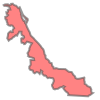

In [12]:
poligon = gdf['geometry'][2]
poligon

<AxesSubplot:>

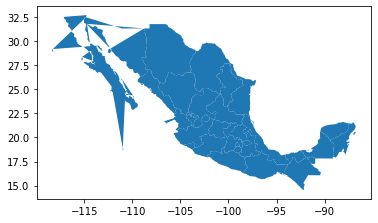

In [13]:
poligon = gdf['geometry']
poligon.plot()

In [14]:
gdf.to_csv('poligonos_mx.csv')

In [15]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
df = pd.read_csv('poligonos_mx.csv') #Se lee el csv como un dataframe normal y después se convierte a geodataframe
df['geometry'] = df['geometry'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(df, crs='epsg:4326')
gdf.head()

,Unnamed: 0,estado,geometry
0,0,ZAC,"POLYGON ((-100.83230 24.55490, -100.85400 24.5..."
1,1,YUC,"POLYGON ((-87.53860 21.48640, -87.52560 21.287..."
2,2,VER,"POLYGON ((-97.79320 22.24960, -97.76810 22.049..."
3,3,TLA,"POLYGON ((-98.58490 19.46750, -98.63610 19.481..."
4,4,TAM,"POLYGON ((-97.79320 22.24960, -97.87290 22.197..."


In [18]:
from shapely.geometry import Polygon, Point

point = Point(-89.6354154, 21.0030982)
for index, row in gdf.iterrows():
    poligon = gdf['geometry'][index]
    if poligon.contains(point):
        print(gdf['estado'][index])

YUC
